<a href="https://colab.research.google.com/github/GreysiluLB/Introduccion_Python_QLAB_2025_2/blob/main/CODE_GRUPO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# LIBRERÍAS

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib.collections import PolyCollection, LineCollection

In [2]:
# CONFIGURACIÓN DE LOS GRÁFICOS

!sudo apt-get install dvipng
!sudo apt-get install texlive-latex-extra
!sudo apt-get install texlive-fonts-recommended
!sudo apt-get install cm-super
!sudo apt install texlive-lang-greek

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  ghostscript libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common texlive-base
  texlive-binaries xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper perl-tk xpdf | pdf-viewer xzdec
The following NEW packages will be installed:
  dvipng dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono
  fonts-urw-base35 ghostscript libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2de

In [8]:
# IMPORTACIÓN DE DATOS
# Previo a la importación de datos, hagan click en el ícono de la carpeta en la parte izquierda y arrastren el archivo excel.

df = pd.read_excel('/content/ALEMANIA.xlsx', sheet_name='Trimestrales') # La base de datos tendrá como nombre df

df.set_index('t', inplace=True) # Indexamos los datos con la variable de tiempo (temporarily with string index)

fecha = pd.date_range(start='1/1/1991', end='31/03/2022', freq='QE') # Creamos una variable de tiempo para poder delimitar los gráficos
df.index = fecha # Assign the DatetimeIndex to df's index

print(df) # Mostramos la base de datos con nombre df

print(df.y) # Podemos usar una variable de la base de datos con: nombre de la base + . + nombre de la variable

                c_priv       c_pub         inv    inv_priv    inv_pub  \
1991-03-31  346.948929  108.255354  138.663921  123.174629  15.489292   
1991-06-30  353.549020  116.879085  168.174837  148.039216  20.135621   
1991-09-30  353.146302  118.620579  164.282958  142.122186  22.160772   
1991-12-31  372.722777  139.491320  167.394003  143.146239  24.247764   
1992-03-31  353.304100  115.866632  150.174364  132.443695  17.730669   
...                ...         ...         ...         ...        ...   
2021-03-31  415.452248  192.494257  171.700033  152.373810  19.326223   
2021-06-30  432.180253  195.113998  193.226697  167.846054  25.380643   
2021-09-30  461.439974  193.966849  192.187319  165.513679  26.673640   
2021-12-31  476.802871  211.075598  199.261244  168.277512  30.983732   
2022-03-31  461.128093  199.834012  182.790479  162.743188  20.047291   

                   exp         imp           y  Unnamed: 9  \
1991-03-31  151.309720  152.542010  619.818781         NaN   

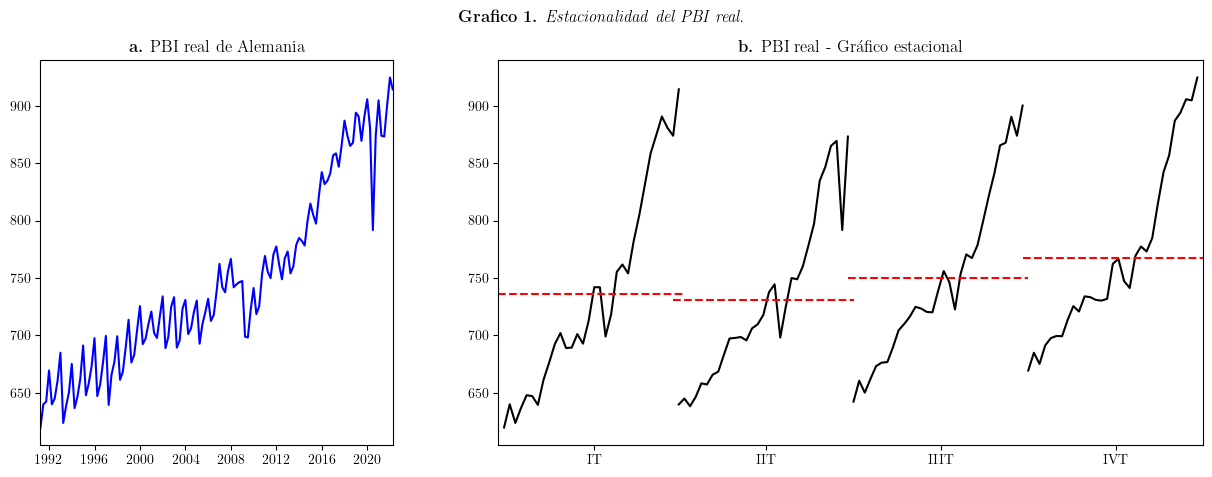

In [9]:
# ESTACIONALIDAD PBI

# Definimos una variable para graficar. Puede cambiar de variable (var = df.c_priv) pero recuerde cambiar los títulos del gráfico
var = df.y

# GRÁFICO 1. Estacionalidad de una serie
# Se puede analizar la estacionalidad de una serie haciendo un gráfico de la evolución de los valores en cada uno de los trimestres
# Este código agrupa los datos de cada trimestre para cada año y se grafica. Además presenta los promedios de cada uno de los trimestres.
import matplotlib.dates as mdates # Import the matplotlib.dates module
fig1, ax1 = plt.subplots(1,2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 2]})
ax1[0].plot(var, 'b')
ax1[0].set_title(r'\textbf{a.} PBI real de Alemania') # Título
ax1[0].set_xlim(mdates.date2num(fecha[0].to_pydatetime()), mdates.date2num(fecha[-1].to_pydatetime())) # FIX: Convert Timestamp objects to numeric dates for matplotlib's xlim

quarter = getattr(var.index, 'quarter')
year = getattr(var.index, 'year')
seasonal_plot = pd.DataFrame({'Values': var.values, 'Year': year, 'Quarter': quarter})
piv = pd.pivot_table(seasonal_plot, index=['Quarter', 'Year'], values='Values')
quarter_name = ['IT', 'IIT', 'IIIT', 'IVT']
ticks = np.zeros(len(quarter_name))

for i in np.arange(1,5):
  temp = piv[piv.index.get_level_values(0) == i]
  x_min = 1+len(temp)*(i-1)
  x_max = len(temp)*i+1
  ax1[1].plot(np.arange(x_min,x_max), temp.values, 'k')
  ticks[i-1] =  (x_min+x_max)/2
  plt.hlines(y=temp.values.mean(), xmin=+len(temp)*(i-1), xmax=len(temp)*i+1, color='r', linestyle='dashed')

ax1[1].set_xticks(ticks)
ax1[1].set_xticklabels(quarter_name)
ax1[1].set_xlim(0,len(seasonal_plot))
ax1[1].set_title(r'\textbf{b.} PBI real - Gráfico estacional') # Título
fig1.suptitle(r'\textbf{Grafico 1.} \textit{Estacionalidad del PBI real.}', fontweight="bold") # Título
fig1.subplots_adjust(top=0.88) # Para poder separar el título general y los subtitulos (poner el número que mejor les parezca)

# Guardamos el gráfico en PDF para luego descargarlo. El archivo en PDF se ha guardado en la misma carpeta donde subieron el archivo en excel
# Para descargarlo seleccionan el archivo y le dan clik en los tres puntos que aparece en la parte derecha y luego en descargar.
plt.savefig("Estacionalidad_PBI.pdf", format="pdf", bbox_inches="tight")

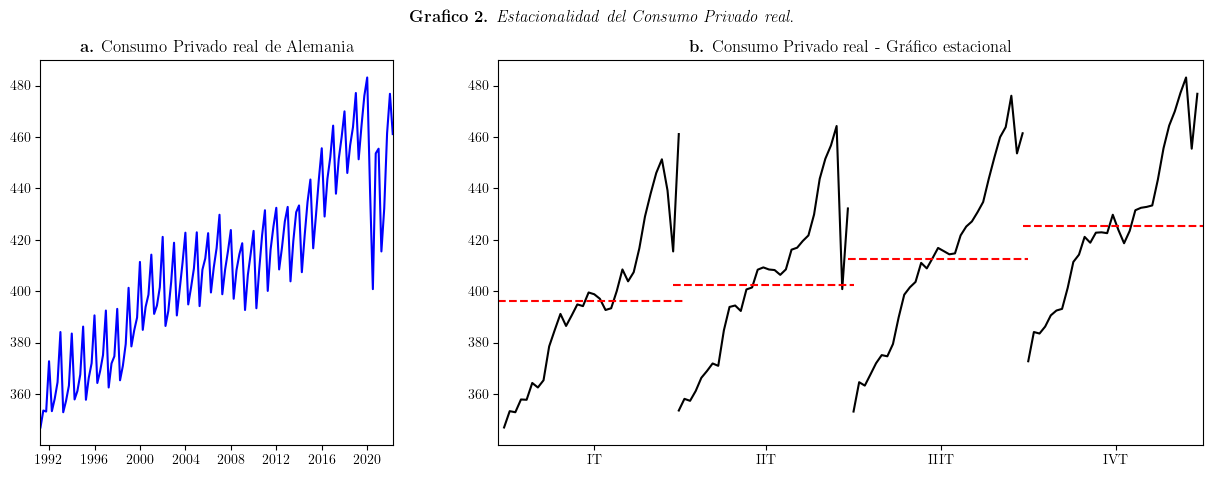

In [10]:
# ESTACIONALIDAD CONSUMO PRIVADO

# Definimos una variable para graficar. Puede cambiar de variable (var = df.c_priv) pero recuerde cambiar los títulos del gráfico
var = df.c_priv


# Se puede analizar la estacionalidad de una serie haciendo un gráfico de la evolución de los valores en cada uno de los trimestres
# Este código agrupa los datos de cada trimestre para cada año y se grafica. Además presenta los promedios de cada uno de los trimestres.
import matplotlib.dates as mdates # Import the matplotlib.dates module
fig1, ax1 = plt.subplots(1,2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 2]})
ax1[0].plot(var, 'b')
ax1[0].set_title(r'\textbf{a.} Consumo Privado real de Alemania') # Título
ax1[0].set_xlim(mdates.date2num(fecha[0].to_pydatetime()), mdates.date2num(fecha[-1].to_pydatetime())) # FIX: Convert Timestamp objects to numeric dates for matplotlib's xlim

quarter = getattr(var.index, 'quarter')
year = getattr(var.index, 'year')
seasonal_plot = pd.DataFrame({'Values': var.values, 'Year': year, 'Quarter': quarter})
piv = pd.pivot_table(seasonal_plot, index=['Quarter', 'Year'], values='Values')
quarter_name = ['IT', 'IIT', 'IIIT', 'IVT']
ticks = np.zeros(len(quarter_name))

for i in np.arange(1,5):
  temp = piv[piv.index.get_level_values(0) == i]
  x_min = 1+len(temp)*(i-1)
  x_max = len(temp)*i+1
  ax1[1].plot(np.arange(x_min,x_max), temp.values, 'k')
  ticks[i-1] =  (x_min+x_max)/2
  plt.hlines(y=temp.values.mean(), xmin=+len(temp)*(i-1), xmax=len(temp)*i+1, color='r', linestyle='dashed')

ax1[1].set_xticks(ticks)
ax1[1].set_xticklabels(quarter_name)
ax1[1].set_xlim(0,len(seasonal_plot))
ax1[1].set_title(r'\textbf{b.} Consumo Privado real - Gráfico estacional') # Título
fig1.suptitle(r'\textbf{Grafico 2.} \textit{Estacionalidad del Consumo Privado real.}', fontweight="bold") # Título
fig1.subplots_adjust(top=0.88)

# Guardamos el gráfico en PDF para luego descargarlo.
# Para descargarlo seleccionan el archivo y le dan clik en los tres puntos que aparece en la parte derecha y luego en descargar.
plt.savefig("Estacionalidad_ConsumoPriv.pdf", format="pdf", bbox_inches="tight")

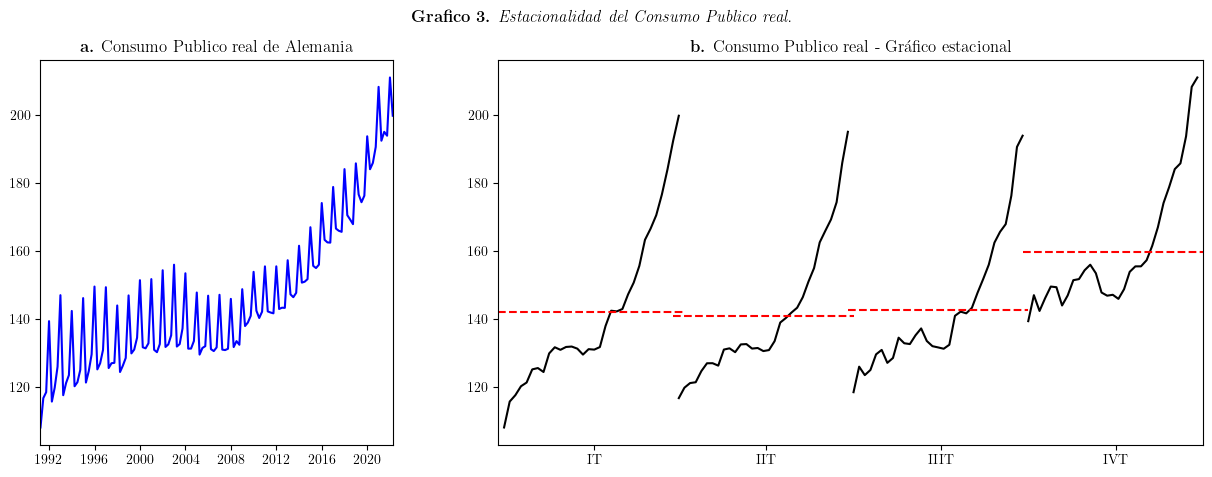

In [11]:
# ESTACIONALIDAD DEL CONSUMO PUBLICO

# Definimos una variable para graficar. Puede cambiar de variable (var = df.c_priv) pero recuerde cambiar los títulos del gráfico
var = df.c_pub


# Este código agrupa los datos de cada trimestre para cada año y se grafica. Además presenta los promedios de cada uno de los trimestres.
import matplotlib.dates as mdates # Import the matplotlib.dates module
fig1, ax1 = plt.subplots(1,2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 2]})
ax1[0].plot(var, 'b')
ax1[0].set_title(r'\textbf{a.} Consumo Publico real de Alemania') # Título
ax1[0].set_xlim(mdates.date2num(fecha[0].to_pydatetime()), mdates.date2num(fecha[-1].to_pydatetime())) # FIX: Convert Timestamp objects to numeric dates for matplotlib's xlim

quarter = getattr(var.index, 'quarter')
year = getattr(var.index, 'year')
seasonal_plot = pd.DataFrame({'Values': var.values, 'Year': year, 'Quarter': quarter})
piv = pd.pivot_table(seasonal_plot, index=['Quarter', 'Year'], values='Values')
quarter_name = ['IT', 'IIT', 'IIIT', 'IVT']
ticks = np.zeros(len(quarter_name))

for i in np.arange(1,5):
  temp = piv[piv.index.get_level_values(0) == i]
  x_min = 1+len(temp)*(i-1)
  x_max = len(temp)*i+1
  ax1[1].plot(np.arange(x_min,x_max), temp.values, 'k')
  ticks[i-1] =  (x_min+x_max)/2
  plt.hlines(y=temp.values.mean(), xmin=+len(temp)*(i-1), xmax=len(temp)*i+1, color='r', linestyle='dashed')

ax1[1].set_xticks(ticks)
ax1[1].set_xticklabels(quarter_name)
ax1[1].set_xlim(0,len(seasonal_plot))
ax1[1].set_title(r'\textbf{b.} Consumo Publico real - Gráfico estacional') # Título
fig1.suptitle(r'\textbf{Grafico 3.} \textit{Estacionalidad del Consumo Publico real.}', fontweight="bold") # Título
fig1.subplots_adjust(top=0.88) # Para poder separar el título general y los subtitulos (poner el número que mejor les parezca)

# Guardamos el gráfico en PDF para luego descargarlo. El archivo en PDF se ha guardado en la misma carpeta donde subieron el archivo en excel
# Para descargarlo seleccionan el archivo y le dan clik en los tres puntos que aparece en la parte derecha y luego en descargar.
plt.savefig("Estacionalidad_ConsumoPub.pdf", format="pdf", bbox_inches="tight")

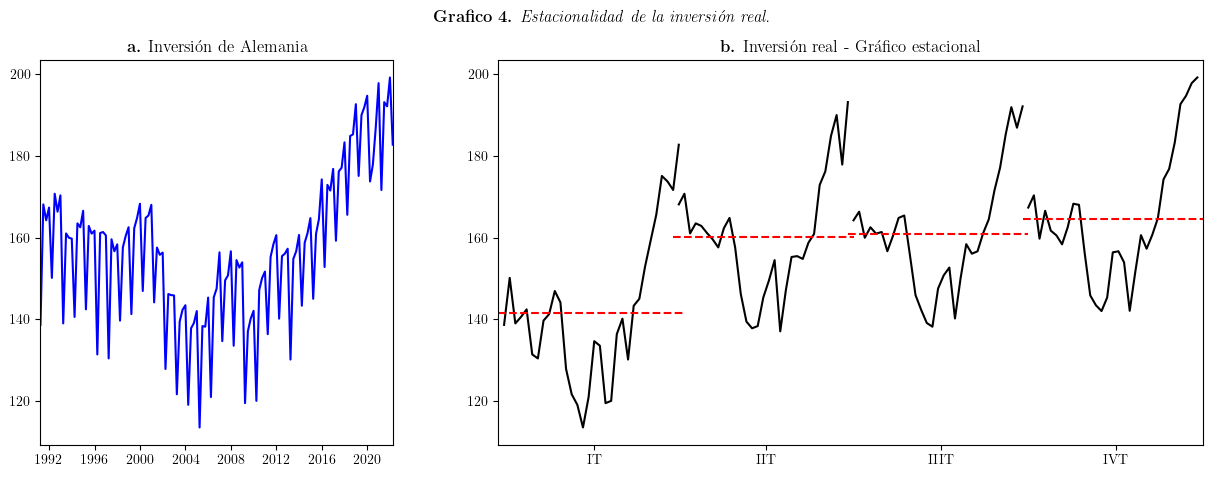

In [12]:
# ESTACIONALIDAD de la inversión

# Definimos una variable para graficar.
var = df.inv

# Este código agrupa los datos de cada trimestre para cada año y se grafica. Además presenta los promedios de cada uno de los trimestres.
import matplotlib.dates as mdates # Import the matplotlib.dates module
fig1, ax1 = plt.subplots(1,2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 2]})
ax1[0].plot(var, 'b')
ax1[0].set_title(r'\textbf{a.} Inversión de Alemania') # Título
ax1[0].set_xlim(mdates.date2num(fecha[0].to_pydatetime()), mdates.date2num(fecha[-1].to_pydatetime())) # FIX: Convert Timestamp objects to numeric dates for matplotlib's xlim

quarter = getattr(var.index, 'quarter')
year = getattr(var.index, 'year')
seasonal_plot = pd.DataFrame({'Values': var.values, 'Year': year, 'Quarter': quarter})
piv = pd.pivot_table(seasonal_plot, index=['Quarter', 'Year'], values='Values')
quarter_name = ['IT', 'IIT', 'IIIT', 'IVT']
ticks = np.zeros(len(quarter_name))

for i in np.arange(1,5):
  temp = piv[piv.index.get_level_values(0) == i]
  x_min = 1+len(temp)*(i-1)
  x_max = len(temp)*i+1
  ax1[1].plot(np.arange(x_min,x_max), temp.values, 'k')
  ticks[i-1] =  (x_min+x_max)/2
  plt.hlines(y=temp.values.mean(), xmin=+len(temp)*(i-1), xmax=len(temp)*i+1, color='r', linestyle='dashed')

ax1[1].set_xticks(ticks)
ax1[1].set_xticklabels(quarter_name)
ax1[1].set_xlim(0,len(seasonal_plot))
ax1[1].set_title(r'\textbf{b.} Inversión real - Gráfico estacional') # Título
fig1.suptitle(r'\textbf{Grafico 4.} \textit{Estacionalidad de la inversión real.}', fontweight="bold") # Título
fig1.subplots_adjust(top=0.88) # Para poder separar el título general y los subtitulos (poner el número que mejor les parezca)

# Guardamos el gráfico en PDF para luego descargarlo. El archivo en PDF se ha guardado en la misma carpeta donde subieron el archivo en excel
# Para descargarlo seleccionan el archivo y le dan clik en los tres puntos que aparece en la parte derecha y luego en descargar.
plt.savefig("Estacionalidad_Inversion.pdf", format="pdf", bbox_inches="tight")

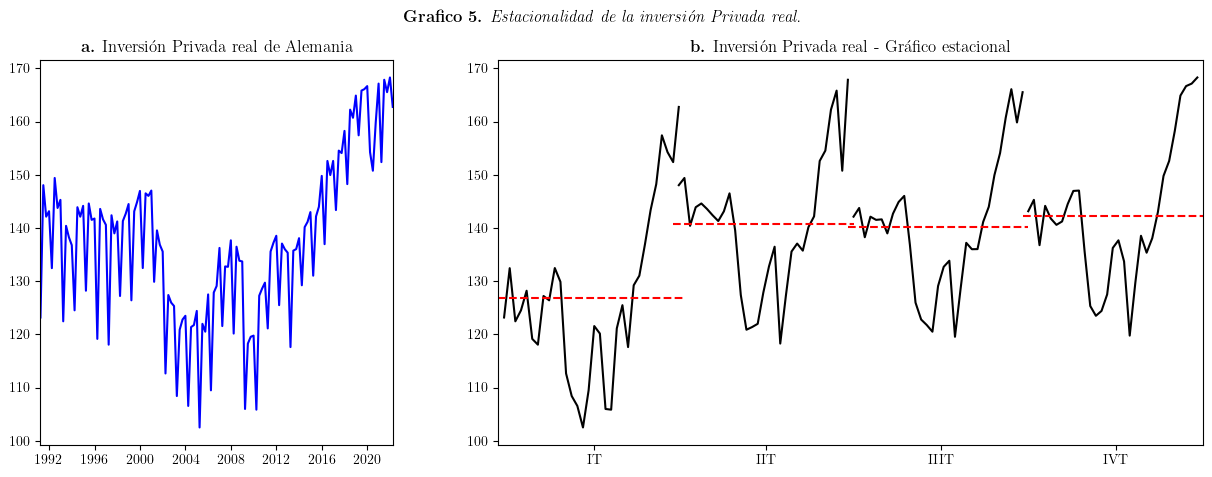

In [13]:
# ESTACIONALIDAD de la inversión Privada

# Definimos una variable para graficar.
var = df.inv_priv

# Este código agrupa los datos de cada trimestre para cada año y se grafica. Además presenta los promedios de cada uno de los trimestres.
import matplotlib.dates as mdates # Import the matplotlib.dates module
fig1, ax1 = plt.subplots(1,2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 2]})
ax1[0].plot(var, 'b')
ax1[0].set_title(r'\textbf{a.} Inversión Privada real de Alemania') # Título
ax1[0].set_xlim(mdates.date2num(fecha[0].to_pydatetime()), mdates.date2num(fecha[-1].to_pydatetime())) # FIX: Convert Timestamp objects to numeric dates for matplotlib's xlim

quarter = getattr(var.index, 'quarter')
year = getattr(var.index, 'year')
seasonal_plot = pd.DataFrame({'Values': var.values, 'Year': year, 'Quarter': quarter})
piv = pd.pivot_table(seasonal_plot, index=['Quarter', 'Year'], values='Values')
quarter_name = ['IT', 'IIT', 'IIIT', 'IVT']
ticks = np.zeros(len(quarter_name))

for i in np.arange(1,5):
  temp = piv[piv.index.get_level_values(0) == i]
  x_min = 1+len(temp)*(i-1)
  x_max = len(temp)*i+1
  ax1[1].plot(np.arange(x_min,x_max), temp.values, 'k')
  ticks[i-1] =  (x_min+x_max)/2
  plt.hlines(y=temp.values.mean(), xmin=+len(temp)*(i-1), xmax=len(temp)*i+1, color='r', linestyle='dashed')

ax1[1].set_xticks(ticks)
ax1[1].set_xticklabels(quarter_name)
ax1[1].set_xlim(0,len(seasonal_plot))
ax1[1].set_title(r'\textbf{b.} Inversión Privada real - Gráfico estacional') # Título
fig1.suptitle(r'\textbf{Grafico 5.} \textit{Estacionalidad de la inversión Privada real.}', fontweight="bold") # Título
fig1.subplots_adjust(top=0.88) # Para poder separar el título general y los subtitulos (poner el número que mejor les parezca)

# Guardamos el gráfico en PDF para luego descargarlo. El archivo en PDF se ha guardado en la misma carpeta donde subieron el archivo en excel
# Para descargarlo seleccionan el archivo y le dan clik en los tres puntos que aparece en la parte derecha y luego en descargar.
plt.savefig("Estacionalidad_InversionPriv.pdf", format="pdf", bbox_inches="tight")

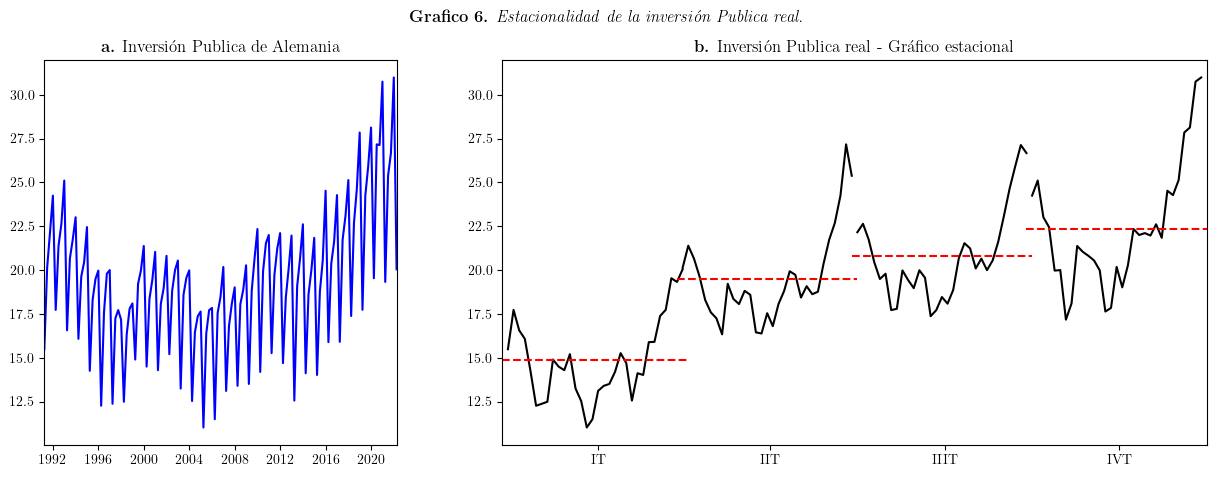

In [14]:
# ESTACIONALIDAD de la inversión pública

# Definimos una variable para graficar.
var = df.inv_pub

# Este código agrupa los datos de cada trimestre para cada año y se grafica. Además presenta los promedios de cada uno de los trimestres.
import matplotlib.dates as mdates # Import the matplotlib.dates module
fig1, ax1 = plt.subplots(1,2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 2]})
ax1[0].plot(var, 'b')
ax1[0].set_title(r'\textbf{a.} Inversión Publica de Alemania') # Título
ax1[0].set_xlim(mdates.date2num(fecha[0].to_pydatetime()), mdates.date2num(fecha[-1].to_pydatetime())) # FIX: Convert Timestamp objects to numeric dates for matplotlib's xlim

quarter = getattr(var.index, 'quarter')
year = getattr(var.index, 'year')
seasonal_plot = pd.DataFrame({'Values': var.values, 'Year': year, 'Quarter': quarter})
piv = pd.pivot_table(seasonal_plot, index=['Quarter', 'Year'], values='Values')
quarter_name = ['IT', 'IIT', 'IIIT', 'IVT']
ticks = np.zeros(len(quarter_name))

for i in np.arange(1,5):
  temp = piv[piv.index.get_level_values(0) == i]
  x_min = 1+len(temp)*(i-1)
  x_max = len(temp)*i+1
  ax1[1].plot(np.arange(x_min,x_max), temp.values, 'k')
  ticks[i-1] =  (x_min+x_max)/2
  plt.hlines(y=temp.values.mean(), xmin=+len(temp)*(i-1), xmax=len(temp)*i+1, color='r', linestyle='dashed')

ax1[1].set_xticks(ticks)
ax1[1].set_xticklabels(quarter_name)
ax1[1].set_xlim(0,len(seasonal_plot))
ax1[1].set_title(r'\textbf{b.} Inversión Publica real - Gráfico estacional') # Título
fig1.suptitle(r'\textbf{Grafico 6.} \textit{Estacionalidad de la inversión Publica real.}', fontweight="bold") # Título
fig1.subplots_adjust(top=0.88) # Para poder separar el título general y los subtitulos (poner el número que mejor les parezca)

# Guardamos el gráfico en PDF para luego descargarlo. El archivo en PDF se ha guardado en la misma carpeta donde subieron el archivo en excel
# Para descargarlo seleccionan el archivo y le dan clik en los tres puntos que aparece en la parte derecha y luego en descargar.
plt.savefig("Estacionalidad_InversionPub.pdf", format="pdf", bbox_inches="tight")

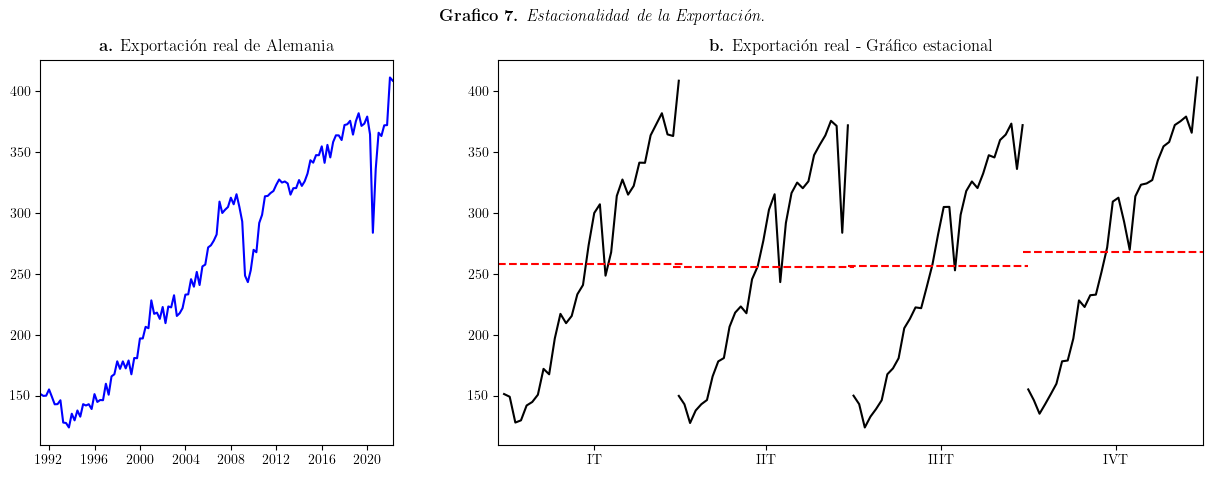

In [15]:
# ESTACIONALIDAD de la Exportación

# Definimos una variable para graficar.
var = df.exp

# Este código agrupa los datos de cada trimestre para cada año y se grafica. Además presenta los promedios de cada uno de los trimestres.
import matplotlib.dates as mdates # Import the matplotlib.dates module
fig1, ax1 = plt.subplots(1,2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 2]})
ax1[0].plot(var, 'b')
ax1[0].set_title(r'\textbf{a.} Exportación real de Alemania') # Título
ax1[0].set_xlim(mdates.date2num(fecha[0].to_pydatetime()), mdates.date2num(fecha[-1].to_pydatetime())) # FIX: Convert Timestamp objects to numeric dates for matplotlib's xlim

quarter = getattr(var.index, 'quarter')
year = getattr(var.index, 'year')
seasonal_plot = pd.DataFrame({'Values': var.values, 'Year': year, 'Quarter': quarter})
piv = pd.pivot_table(seasonal_plot, index=['Quarter', 'Year'], values='Values')
quarter_name = ['IT', 'IIT', 'IIIT', 'IVT']
ticks = np.zeros(len(quarter_name))

for i in np.arange(1,5):
  temp = piv[piv.index.get_level_values(0) == i]
  x_min = 1+len(temp)*(i-1)
  x_max = len(temp)*i+1
  ax1[1].plot(np.arange(x_min,x_max), temp.values, 'k')
  ticks[i-1] =  (x_min+x_max)/2
  plt.hlines(y=temp.values.mean(), xmin=+len(temp)*(i-1), xmax=len(temp)*i+1, color='r', linestyle='dashed')

ax1[1].set_xticks(ticks)
ax1[1].set_xticklabels(quarter_name)
ax1[1].set_xlim(0,len(seasonal_plot))
ax1[1].set_title(r'\textbf{b.} Exportación real - Gráfico estacional') # Título
fig1.suptitle(r'\textbf{Grafico 7.} \textit{Estacionalidad de la Exportación.}', fontweight="bold") # Título
fig1.subplots_adjust(top=0.88) # Para poder separar el título general y los subtitulos (poner el número que mejor les parezca)

# Guardamos el gráfico en PDF para luego descargarlo. El archivo en PDF se ha guardado en la misma carpeta donde subieron el archivo en excel
# Para descargarlo seleccionan el archivo y le dan clik en los tres puntos que aparece en la parte derecha y luego en descargar.
plt.savefig("Estacionalidad_Exportación.pdf", format="pdf", bbox_inches="tight")

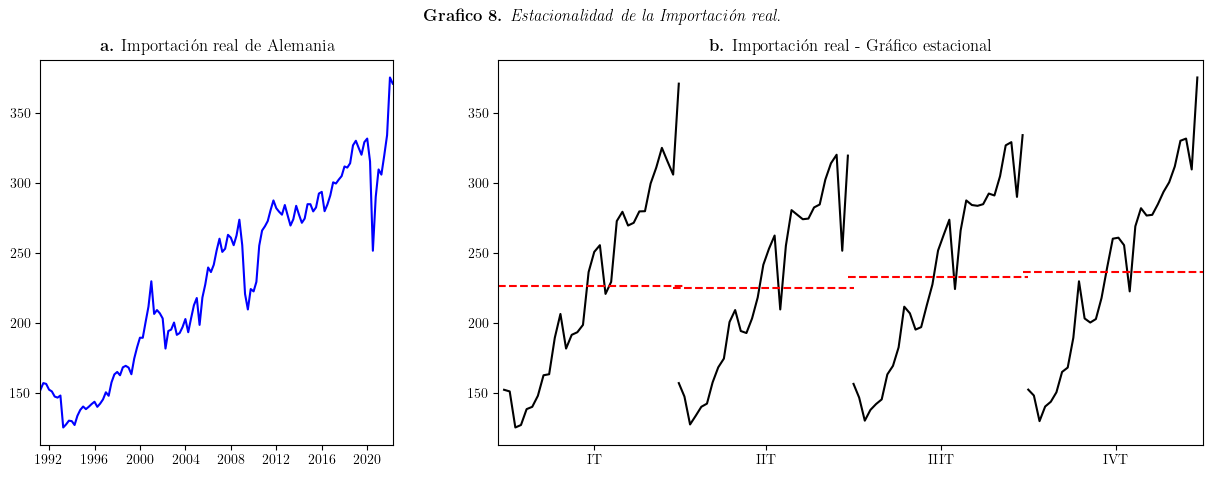

In [16]:
# ESTACIONALIDAD de la importación

# Definimos una variable para graficar.
var = df.imp

# Este código agrupa los datos de cada trimestre para cada año y se grafica. Además presenta los promedios de cada uno de los trimestres.
import matplotlib.dates as mdates # Import the matplotlib.dates module
fig1, ax1 = plt.subplots(1,2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 2]})
ax1[0].plot(var, 'b')
ax1[0].set_title(r'\textbf{a.} Importación real de Alemania') # Título
ax1[0].set_xlim(mdates.date2num(fecha[0].to_pydatetime()), mdates.date2num(fecha[-1].to_pydatetime())) # FIX: Convert Timestamp objects to numeric dates for matplotlib's xlim

quarter = getattr(var.index, 'quarter')
year = getattr(var.index, 'year')
seasonal_plot = pd.DataFrame({'Values': var.values, 'Year': year, 'Quarter': quarter})
piv = pd.pivot_table(seasonal_plot, index=['Quarter', 'Year'], values='Values')
quarter_name = ['IT', 'IIT', 'IIIT', 'IVT']
ticks = np.zeros(len(quarter_name))

for i in np.arange(1,5):
  temp = piv[piv.index.get_level_values(0) == i]
  x_min = 1+len(temp)*(i-1)
  x_max = len(temp)*i+1
  ax1[1].plot(np.arange(x_min,x_max), temp.values, 'k')
  ticks[i-1] =  (x_min+x_max)/2
  plt.hlines(y=temp.values.mean(), xmin=+len(temp)*(i-1), xmax=len(temp)*i+1, color='r', linestyle='dashed')

ax1[1].set_xticks(ticks)
ax1[1].set_xticklabels(quarter_name)
ax1[1].set_xlim(0,len(seasonal_plot))
ax1[1].set_title(r'\textbf{b.} Importación real - Gráfico estacional') # Título
fig1.suptitle(r'\textbf{Grafico 8.} \textit{Estacionalidad de la Importación real.}', fontweight="bold") # Título
fig1.subplots_adjust(top=0.88) # Para poder separar el título general y los subtitulos (poner el número que mejor les parezca)

# Guardamos el gráfico en PDF para luego descargarlo. El archivo en PDF se ha guardado en la misma carpeta donde subieron el archivo en excel
# Para descargarlo seleccionan el archivo y le dan clik en los tres puntos que aparece en la parte derecha y luego en descargar.
plt.savefig("Estacionalidad_Importación.pdf", format="pdf", bbox_inches="tight")

In [17]:
# INSTALACIÓN DEL CENSUS X13 PARA DESESTACIONALIZAR

# IMPORTANTE!
# Descargar:
# https://www2.census.gov/software/x-13arima-seats/x13as/unix-linux/program-archives/x13as_ascii-v1-1-b61.tar.gz
# Pegarlo a la carpeta y luego con el código de abajo se descomprime el archivo y hace la instalación

# Si tienen Windows pongan en comentario el código para MacOS y viceversa.
# Para los que tienen Mac, puede ser que el nombre del archivo sea x13as_ascii-v1-1-b61.tar.gz
# En ese caso renombren el archivo y borren el .gz y lo suben.

# Para Windows
#!tar --gunzip --extract --verbose --file=x13as_ascii-v1-1-b61.tar.gz
# Para MacOS
!tar --extract --verbose --file=x13as_ascii-v1-1-b61.tar

from statsmodels.tsa import x13

import os
os.environ["X13PATH"]="/content/x13as"

x13as/
x13as/testairline.spc
x13as/docs/
x13as/docs/docx13as.pdf
x13as/docs/qrefX13ASunix.pdf
x13as/x13as_ascii


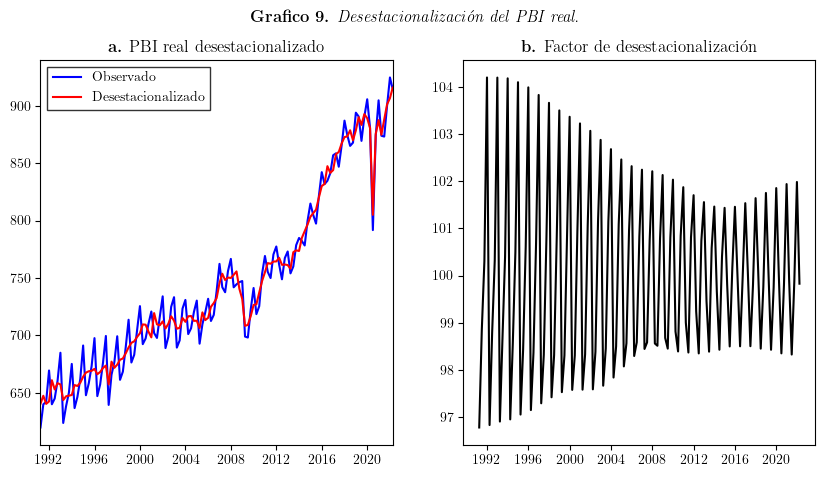

In [18]:
# DESESTACIONALIZACIÓN DEL PBI REAL
# DESESTACIONALIZACIÓN DE UNA SERIE
# Una serie de tiempo la podemos entender como un conjunto de componentes que la conforman:
# Podemos descomponer una serie Yt en un ciclo Ct, una tendencia Tt, estacionalidad St y un componente irregular It (residuo)

# Cuando una serie tiene estacionalidad, esta puede interactuar con los demás componentes de forma aditiva o multiplicativa
# a) Aditiva:       Yt = Ct + Tt + St + It (cuando: Yt no crece exponencialmente y la estacionalidad no depende del nivel de la serie)
# b) Multiplicativa Yt = Ct * Tt * St * It (cuando: Yt crece exponencialmente, la amplitud de la estacionalidad depende del nivel de la serie)

# En los casos de las variables que estamos analizando, el caso que más se adecúa es de estacionalidad multiplicativa.
# Por ello, aplicamos logaritmo a las series, la cual resulta en:
# lnYt = lnCt + lnTt + lnSt + lnIt
# Y obtenemos el logaritmo de la serie desestacionalizada
# lnYtsa = lnYt - lnSt = lnCt + lnTt + lnIt
# Realizamos el proceso de desestacionalización solo en el caso podamos observar que existe estacionalidad.
# Remover la estacionalidad es un paso previo para luego descomponer la serie en ciclo Ct y tendendencia Ct.

# Difinimos una serie
var = df.y
# Desestacionalizamos el logartimo de la serie (np.log(var)).
# A esta función le indicamos que ya no tome logaritmo (log=false) a la serie porque ya el input ya está en logaritmo
logvar_sa = x13.x13_arima_analysis(np.log(var), freq = 'Q', log=False, outlier=True) # Logaritmo de la sere desestacionalizada

#  Comparamos la serie original y la serie desestacionalizada, ambas en niveles (en sus unidades originales, no el logartimos)
# Para ello tomamos exponencial al logaritmo de la serie desestacionalizada

var_sa = np.exp(logvar_sa.seasadj) # Serie desestacionalizada Ytsa
var_sf = var/var_sa*100 # Factor de desestacionalización St (No es necesario multiplicar por 100)

fig2, ax2 = plt.subplots(1,2, figsize=(10, 5))
ax2[0].plot(var, 'b', label='Observado')
ax2[0].plot(var_sa, 'r', label='Desestacionalizado')
ax2[0].set_title(r'\textbf{a.} PBI real desestacionalizado')
ax2[0].legend(fancybox=False).get_frame().set_edgecolor('k')
ax2[0].set_xlim(fecha[0],fecha[-1])
ax2[1].plot(var_sf, 'k')
ax2[1].set_title(r'\textbf{b.} Factor de desestacionalización')
fig2.suptitle(r'\textbf{Grafico 9.} \textit{Desestacionalización del PBI real.}', fontweight="bold") # Título
fig2.subplots_adjust(top=0.88)
plt.savefig("PBI_Desestacionalización.pdf", format="pdf", bbox_inches="tight")

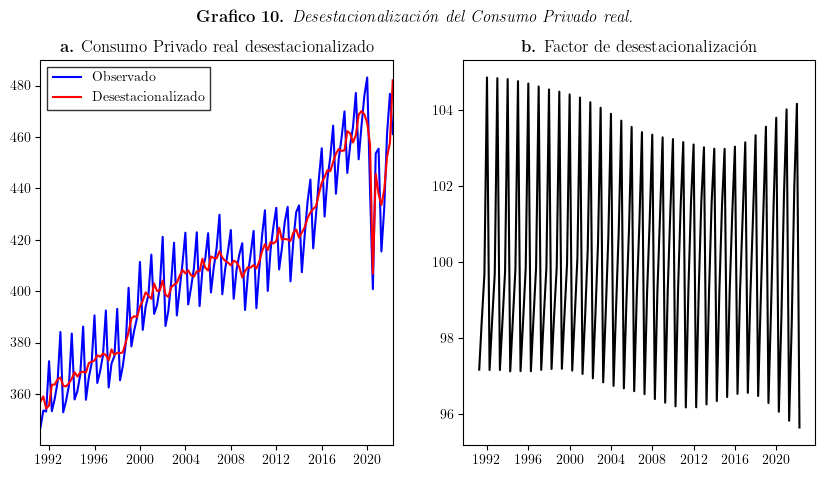

In [19]:

# Difinimos una serie
var = df.c_priv
# Desestacionalizamos el logartimo de la serie (np.log(var)).
# A esta función le indicamos que ya no tome logaritmo (log=false) a la serie porque ya el input ya está en logaritmo
logvar_sa = x13.x13_arima_analysis(np.log(var), freq = 'Q', log=False, outlier=True) # Logaritmo de la sere desestacionalizada

# GRÁFICO 2. Comparamos la serie original y la serie desestacionalizada, ambas en niveles (en sus unidades originales, no el logartimos)
# Para ello tomamos exponencial al logaritmo de la serie desestacionalizada

var_sa = np.exp(logvar_sa.seasadj) # Serie desestacionalizada Ytsa
var_sf = var/var_sa*100 # Factor de desestacionalización St (No es necesario multiplicar por 100)

fig2, ax2 = plt.subplots(1,2, figsize=(10, 5))
ax2[0].plot(var, 'b', label='Observado')
ax2[0].plot(var_sa, 'r', label='Desestacionalizado')
ax2[0].set_title(r'\textbf{a.} Consumo Privado real desestacionalizado')
ax2[0].legend(fancybox=False).get_frame().set_edgecolor('k')
ax2[0].set_xlim(fecha[0],fecha[-1])
ax2[1].plot(var_sf, 'k')
ax2[1].set_title(r'\textbf{b.} Factor de desestacionalización')
fig2.suptitle(r'\textbf{Grafico 10.} \textit{Desestacionalización del Consumo Privado real.}', fontweight="bold") # Título
fig2.subplots_adjust(top=0.88)
plt.savefig("ConsumoPriv_Desestacionalización.pdf", format="pdf", bbox_inches="tight")


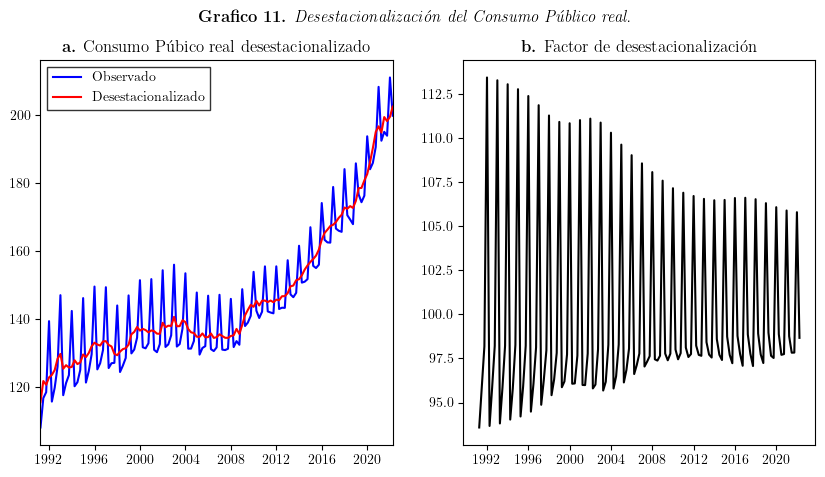

In [24]:
# Difinimos una serie
var = df.c_pub
# Desestacionalizamos el logartimo de la serie (np.log(var)).
# A esta función le indicamos que ya no tome logaritmo (log=false) a la serie porque ya el input ya está en logaritmo
logvar_sa = x13.x13_arima_analysis(np.log(var), freq = 'Q', log=False, outlier=True) # Logaritmo de la sere desestacionalizada

# GRÁFICO 2. Comparamos la serie original y la serie desestacionalizada, ambas en niveles (en sus unidades originales, no el logartimos)
# Para ello tomamos exponencial al logaritmo de la serie desestacionalizada

var_sa = np.exp(logvar_sa.seasadj) # Serie desestacionalizada Ytsa
var_sf = var/var_sa*100 # Factor de desestacionalización St (No es necesario multiplicar por 100)

fig2, ax2 = plt.subplots(1,2, figsize=(10, 5))
ax2[0].plot(var, 'b', label='Observado')
ax2[0].plot(var_sa, 'r', label='Desestacionalizado')
ax2[0].set_title(r'\textbf{a.} Consumo Púbico real desestacionalizado')
ax2[0].legend(fancybox=False).get_frame().set_edgecolor('k')
ax2[0].set_xlim(fecha[0],fecha[-1])
ax2[1].plot(var_sf, 'k')
ax2[1].set_title(r'\textbf{b.} Factor de desestacionalización')
fig2.suptitle(r'\textbf{Grafico 11.} \textit{Desestacionalización del Consumo Público real.}', fontweight="bold") # Título
fig2.subplots_adjust(top=0.88)
plt.savefig("ConsumoPub_Desestacionalización.pdf", format="pdf", bbox_inches="tight")

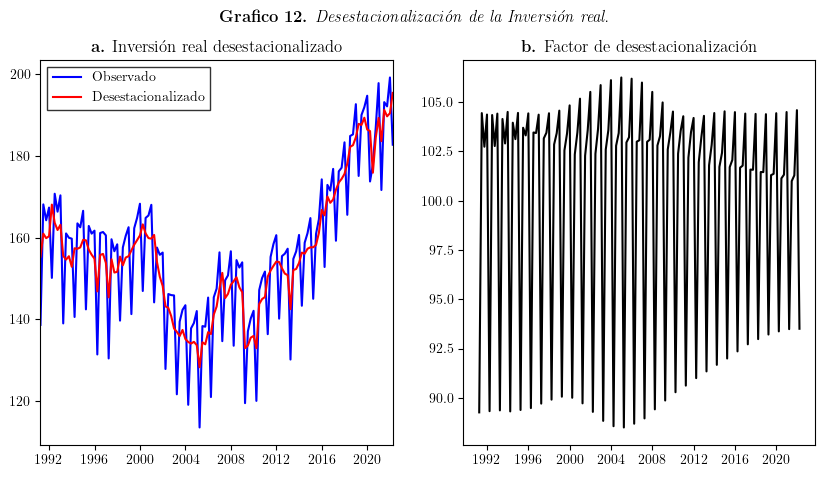

In [25]:
# Difinimos una serie
var = df.inv
# Desestacionalizamos el logartimo de la serie (np.log(var)).
# A esta función le indicamos que ya no tome logaritmo (log=false) a la serie porque ya el input ya está en logaritmo
logvar_sa = x13.x13_arima_analysis(np.log(var), freq = 'Q', log=False, outlier=True) # Logaritmo de la sere desestacionalizada

# GRÁFICO 2. Comparamos la serie original y la serie desestacionalizada, ambas en niveles (en sus unidades originales, no el logartimos)
# Para ello tomamos exponencial al logaritmo de la serie desestacionalizada

var_sa = np.exp(logvar_sa.seasadj) # Serie desestacionalizada Ytsa
var_sf = var/var_sa*100 # Factor de desestacionalización St (No es necesario multiplicar por 100)

fig2, ax2 = plt.subplots(1,2, figsize=(10, 5))
ax2[0].plot(var, 'b', label='Observado')
ax2[0].plot(var_sa, 'r', label='Desestacionalizado')
ax2[0].set_title(r'\textbf{a.} Inversión real desestacionalizado')
ax2[0].legend(fancybox=False).get_frame().set_edgecolor('k')
ax2[0].set_xlim(fecha[0],fecha[-1])
ax2[1].plot(var_sf, 'k')
ax2[1].set_title(r'\textbf{b.} Factor de desestacionalización')
fig2.suptitle(r'\textbf{Grafico 12.} \textit{Desestacionalización de la Inversión real.}', fontweight="bold") # Título
fig2.subplots_adjust(top=0.88)
plt.savefig("Inversión_Desestacionalización.pdf", format="pdf", bbox_inches="tight")

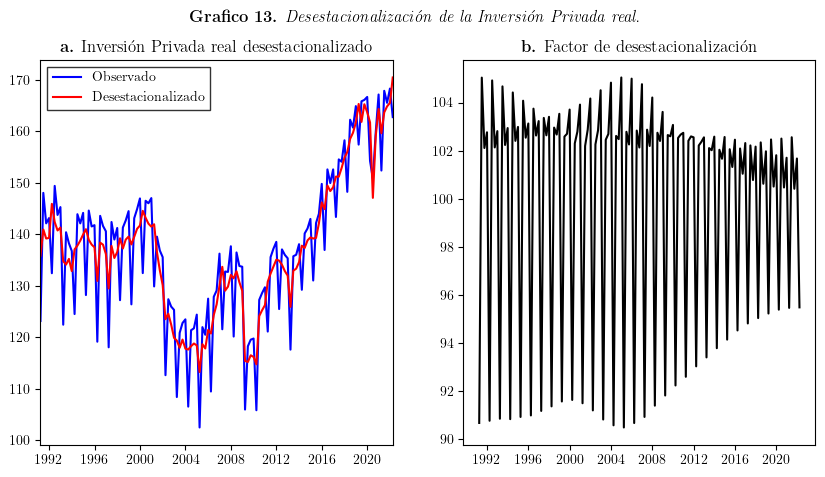

In [26]:
# Difinimos una serie
var = df.inv_priv
# Desestacionalizamos el logartimo de la serie (np.log(var)).
# A esta función le indicamos que ya no tome logaritmo (log=false) a la serie porque ya el input ya está en logaritmo
logvar_sa = x13.x13_arima_analysis(np.log(var), freq = 'Q', log=False, outlier=True) # Logaritmo de la sere desestacionalizada

# GRÁFICO 2. Comparamos la serie original y la serie desestacionalizada, ambas en niveles (en sus unidades originales, no el logartimos)
# Para ello tomamos exponencial al logaritmo de la serie desestacionalizada

var_sa = np.exp(logvar_sa.seasadj) # Serie desestacionalizada Ytsa
var_sf = var/var_sa*100 # Factor de desestacionalización St (No es necesario multiplicar por 100)

fig2, ax2 = plt.subplots(1,2, figsize=(10, 5))
ax2[0].plot(var, 'b', label='Observado')
ax2[0].plot(var_sa, 'r', label='Desestacionalizado')
ax2[0].set_title(r'\textbf{a.} Inversión Privada real desestacionalizado')
ax2[0].legend(fancybox=False).get_frame().set_edgecolor('k')
ax2[0].set_xlim(fecha[0],fecha[-1])
ax2[1].plot(var_sf, 'k')
ax2[1].set_title(r'\textbf{b.} Factor de desestacionalización')
fig2.suptitle(r'\textbf{Grafico 13.} \textit{Desestacionalización de la Inversión Privada real.}', fontweight="bold") # Título
fig2.subplots_adjust(top=0.88)
plt.savefig("ConsumoPub_Desestacionalización.pdf", format="pdf", bbox_inches="tight")

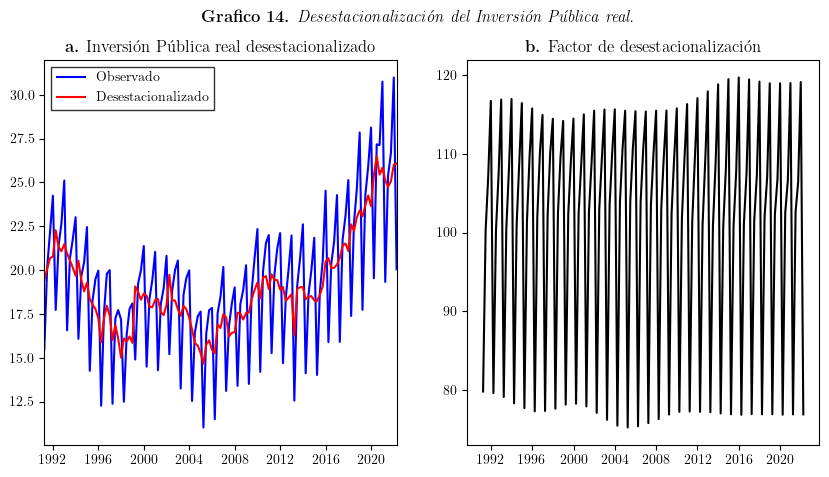

In [27]:
# Difinimos una serie
var = df.inv_pub
# Desestacionalizamos el logartimo de la serie (np.log(var)).
# A esta función le indicamos que ya no tome logaritmo (log=false) a la serie porque ya el input ya está en logaritmo
logvar_sa = x13.x13_arima_analysis(np.log(var), freq = 'Q', log=False, outlier=True) # Logaritmo de la sere desestacionalizada

# GRÁFICO 2. Comparamos la serie original y la serie desestacionalizada, ambas en niveles (en sus unidades originales, no el logartimos)
# Para ello tomamos exponencial al logaritmo de la serie desestacionalizada

var_sa = np.exp(logvar_sa.seasadj) # Serie desestacionalizada Ytsa
var_sf = var/var_sa*100 # Factor de desestacionalización St (No es necesario multiplicar por 100)

fig2, ax2 = plt.subplots(1,2, figsize=(10, 5))
ax2[0].plot(var, 'b', label='Observado')
ax2[0].plot(var_sa, 'r', label='Desestacionalizado')
ax2[0].set_title(r'\textbf{a.} Inversión Pública real desestacionalizado')
ax2[0].legend(fancybox=False).get_frame().set_edgecolor('k')
ax2[0].set_xlim(fecha[0],fecha[-1])
ax2[1].plot(var_sf, 'k')
ax2[1].set_title(r'\textbf{b.} Factor de desestacionalización')
fig2.suptitle(r'\textbf{Grafico 14.} \textit{Desestacionalización del Inversión Pública real.}', fontweight="bold") # Título
fig2.subplots_adjust(top=0.88)
plt.savefig("InversiónPub_Desestacionalización.pdf", format="pdf", bbox_inches="tight")

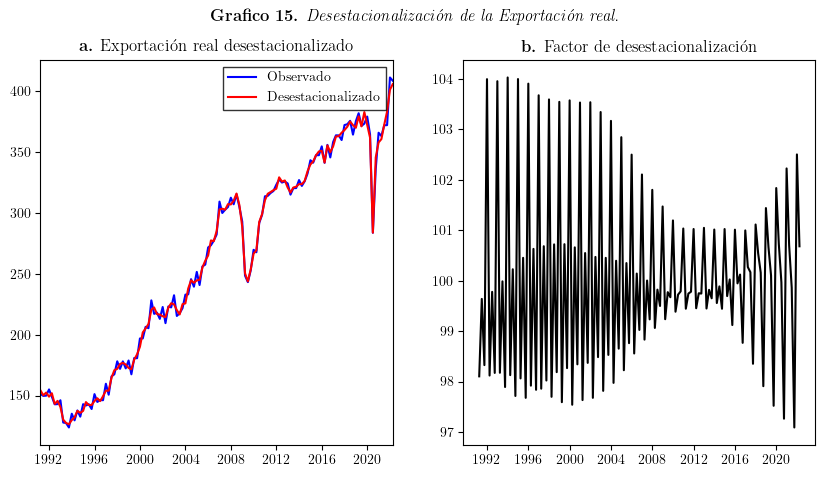

In [28]:
# Difinimos una serie
var = df.exp
# Desestacionalizamos el logartimo de la serie (np.log(var)).
# A esta función le indicamos que ya no tome logaritmo (log=false) a la serie porque ya el input ya está en logaritmo
logvar_sa = x13.x13_arima_analysis(np.log(var), freq = 'Q', log=False, outlier=True) # Logaritmo de la sere desestacionalizada

# GRÁFICO 2. Comparamos la serie original y la serie desestacionalizada, ambas en niveles (en sus unidades originales, no el logartimos)
# Para ello tomamos exponencial al logaritmo de la serie desestacionalizada

var_sa = np.exp(logvar_sa.seasadj) # Serie desestacionalizada Ytsa
var_sf = var/var_sa*100 # Factor de desestacionalización St (No es necesario multiplicar por 100)

fig2, ax2 = plt.subplots(1,2, figsize=(10, 5))
ax2[0].plot(var, 'b', label='Observado')
ax2[0].plot(var_sa, 'r', label='Desestacionalizado')
ax2[0].set_title(r'\textbf{a.} Exportación real desestacionalizado')
ax2[0].legend(fancybox=False).get_frame().set_edgecolor('k')
ax2[0].set_xlim(fecha[0],fecha[-1])
ax2[1].plot(var_sf, 'k')
ax2[1].set_title(r'\textbf{b.} Factor de desestacionalización')
fig2.suptitle(r'\textbf{Grafico 15.} \textit{Desestacionalización de la Exportación real.}', fontweight="bold") # Título
fig2.subplots_adjust(top=0.88)
plt.savefig("Exportación_Desestacionalización.pdf", format="pdf", bbox_inches="tight")

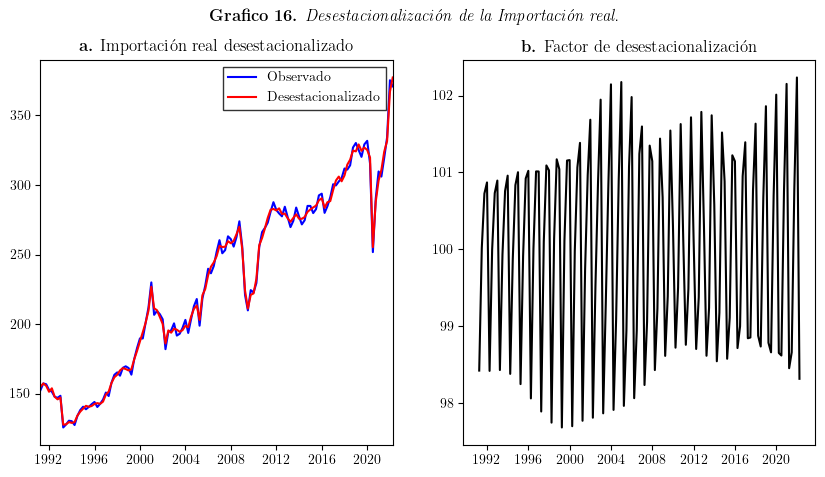

In [29]:
# Difinimos una serie
var = df.imp
# Desestacionalizamos el logartimo de la serie (np.log(var)).
# A esta función le indicamos que ya no tome logaritmo (log=false) a la serie porque ya el input ya está en logaritmo
logvar_sa = x13.x13_arima_analysis(np.log(var), freq = 'Q', log=False, outlier=True) # Logaritmo de la sere desestacionalizada

# GRÁFICO 2. Comparamos la serie original y la serie desestacionalizada, ambas en niveles (en sus unidades originales, no el logartimos)
# Para ello tomamos exponencial al logaritmo de la serie desestacionalizada

var_sa = np.exp(logvar_sa.seasadj) # Serie desestacionalizada Ytsa
var_sf = var/var_sa*100 # Factor de desestacionalización St (No es necesario multiplicar por 100)

fig2, ax2 = plt.subplots(1,2, figsize=(10, 5))
ax2[0].plot(var, 'b', label='Observado')
ax2[0].plot(var_sa, 'r', label='Desestacionalizado')
ax2[0].set_title(r'\textbf{a.} Importación real desestacionalizado')
ax2[0].legend(fancybox=False).get_frame().set_edgecolor('k')
ax2[0].set_xlim(fecha[0],fecha[-1])
ax2[1].plot(var_sf, 'k')
ax2[1].set_title(r'\textbf{b.} Factor de desestacionalización')
fig2.suptitle(r'\textbf{Grafico 16.} \textit{Desestacionalización de la Importación real.}', fontweight="bold") # Título
fig2.subplots_adjust(top=0.88)
plt.savefig("Importación_Desestacionalización.pdf", format="pdf", bbox_inches="tight")

In [30]:
# DESESTACIONALIZAMOS TODAS LAS SERIES

lc_priv_sa = x13.x13_arima_analysis(np.log(df.c_priv), freq = 'Q', log=False, outlier=True)
lc_priv_sa = lc_priv_sa.seasadj

lc_pub_sa = x13.x13_arima_analysis(np.log(df.c_pub), freq = 'Q', log=False, outlier=True)
lc_pub_sa = lc_pub_sa.seasadj

linv_priv_sa = x13.x13_arima_analysis(np.log(df.inv_priv), freq = 'Q', log=False, outlier=True)
linv_priv_sa = linv_priv_sa.seasadj

linv_pub_sa = x13.x13_arima_analysis(np.log(df.inv_pub), freq = 'Q', log=False, outlier=True)
linv_pub_sa = linv_pub_sa.seasadj

lexp_sa = x13.x13_arima_analysis(np.log(df.exp), freq = 'Q', log=False, outlier=True)
lexp_sa = lexp_sa.seasadj

limp_sa = x13.x13_arima_analysis(np.log(df.imp), freq = 'Q', log=False, outlier=True)
limp_sa = limp_sa.seasadj

ly_sa = x13.x13_arima_analysis(np.log(df.y), freq = 'Q', log=False, outlier=True)
ly_sa = ly_sa.seasadj

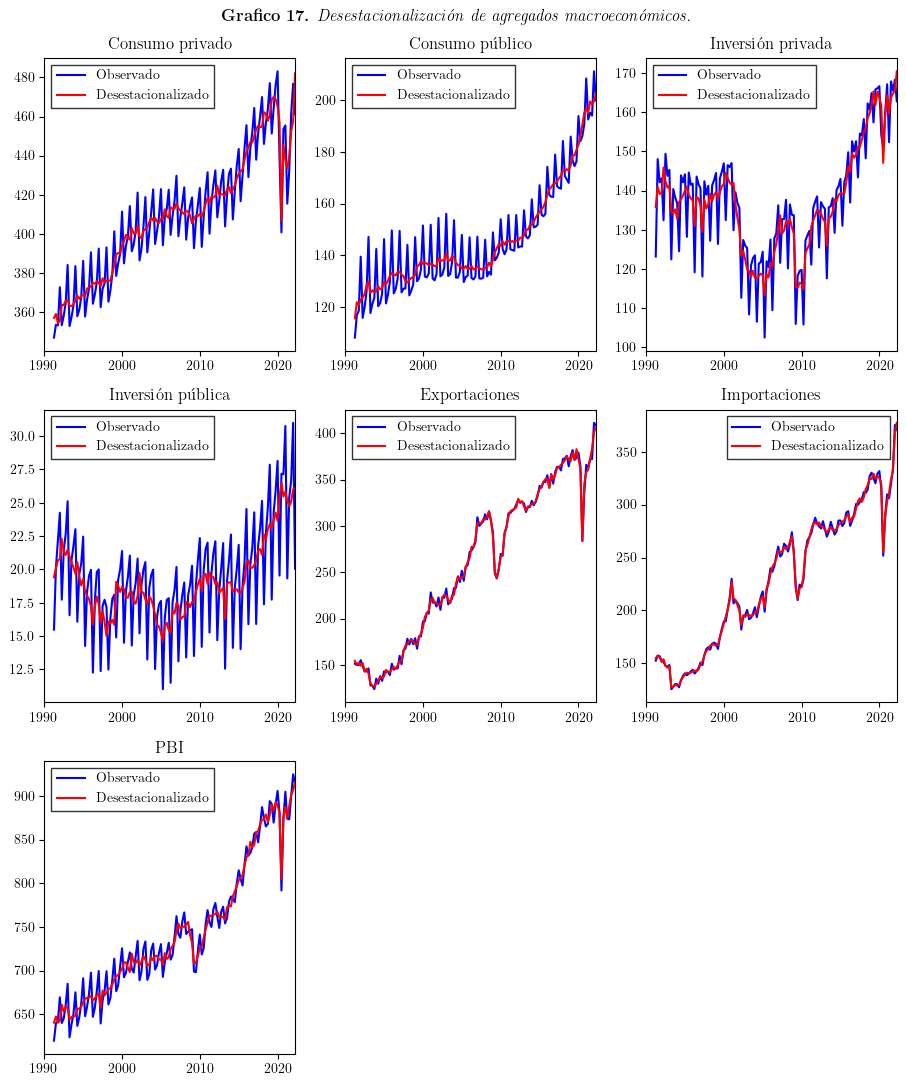

In [51]:
#  Comparamos todas las series en niveles observadas y desestacionalizadas

# Variables observadas
series_obs = [df.c_priv, df.c_pub, df.inv_priv, df.inv_pub, df.exp, df.imp, df.y]
# Variables desestacionalizadas. Tomamos exponencial para poder comparar con las series observadas ya que están en niveles
series_sa = [np.exp(lc_priv_sa), np.exp(lc_pub_sa), np.exp(linv_priv_sa), np.exp(linv_pub_sa), np.exp(lexp_sa), np.exp(limp_sa), np.exp(ly_sa)]
# Lista de nombres
nombres = ['Consumo privado', 'Consumo público', 'Inversión privada', 'Inversión pública', 'Exportaciones', 'Importaciones', 'PBI']

fig3, ax3 = plt.subplots(3,3, figsize=(11, 12))
ax3 = ax3.flatten()
for i in range(len(series_obs)):
    ax3[i].plot(series_obs[i], 'b', label='Observado')
    ax3[i].plot(series_sa[i], 'r', label='Desestacionalizado')
    ax3[i].set_title(nombres[i])
    ax3[i].legend(fancybox=False).get_frame().set_edgecolor('k')
    ax3[i].set_xlim(fecha[0],fecha[-1])
    ax3[i].set_xticks([ '1990', '2000', '2010', '2020'])
    ax3[i].set_xticklabels(['1990', '2000', '2010', '2020'])
ax3[7].axis('off')
ax3[8].axis('off')
fig3.suptitle(r'\textbf{Grafico 17.} \textit{Desestacionalización de agregados macroeconómicos.}', fontweight="bold") # Título
fig3.subplots_adjust(top=0.94)
plt.savefig("Desestacionalización_de_agregados.pdf", format="pdf", bbox_inches="tight")

In [32]:
# USO DE FILTROS PARA EXTRAER CICLO Y TENDENCIA
# En el paso anterior hemos removido la estacionalidad. Ahora vamos a extraer un componente ya sea el ciclo Ct o tendendica Tt.
# Esto va a depender del filtro que usemos.
# En este punto seguimos trabajando con el logaritmo de la variable que vamos a analizar
# ya sea desestacionalizada si tiene estacionalidad o la serie observada si es que no tiene estacionalidad
# En nuestro caso continuamos trabajando con el lnYtsa = lnCt + lnTt + lnIt

# Filtro Hodrick-Prescott: extrae la tendencia Tt asumiendo que Yt = ct + Tt (todas en logaritmo)
# Filtro Baxter-King: extrae el ciclo, removiendo frecuencias muy altas menores a 1.5 año (ruido) y frecuencias muy altas 8 años.

from statsmodels.tsa.filters.hp_filter import hpfilter # Hodrick-Prescott
from statsmodels.tsa.filters.bk_filter import bkfilter # Baxter-King

# Filtro Hodrick-Prescott
# lamb: parámetro de suavizamiento. Para datos anuales: 100, trimestrales: 1600, mensuales 14400.
c_cpriv, t_cpriv = hpfilter(lc_priv_sa, lamb=1600)
c_cpub, t_cpub= hpfilter(lc_pub_sa, lamb=1600)
c_ipriv, t_ipriv = hpfilter(linv_priv_sa, lamb=1600)
c_ipub, t_ipub = hpfilter(linv_pub_sa, lamb=1600)
c_exp, t_exp = hpfilter(lexp_sa, lamb=1600)
c_imp, t_imp = hpfilter(limp_sa, lamb=1600)
c_y, t_y = hpfilter(ly_sa, lamb=1600)

# Filtro Baxter-King
# low = 6 (ciclo de 1.5 años), high = 32 (ciclo de 8 años), K = 12 (se pierden datos al inicio y al final)
c_cpriv_bk = bkfilter(lc_priv_sa, low=6, high=32, K=12)
c_cpub_bk = bkfilter(lc_pub_sa, low=6, high=32, K=12)
c_ipriv_bk = bkfilter(linv_priv_sa, low=6, high=32, K=12)
c_ipub_bk = bkfilter(linv_pub_sa, low=6, high=32, K=12)
c_exp_bk = bkfilter(lexp_sa, low=6, high=32, K=12)
c_imp_bk = bkfilter(limp_sa, low=6, high=32, K=12)
c_y_bk = bkfilter(ly_sa, low=6, high=32, K=12)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


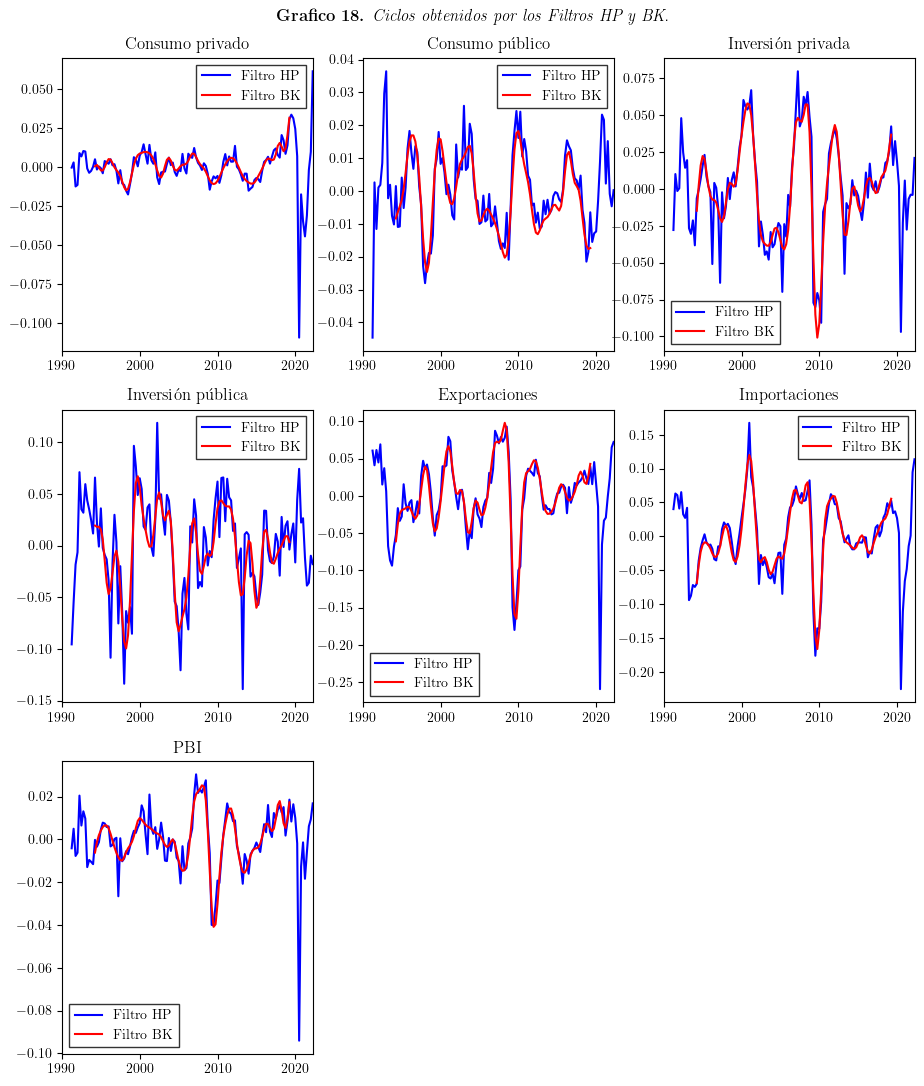

In [50]:
# Comparamos los ciclos obtenidos por el filtro HP y filtro BK

# Ciclos estimados con HP
ciclos_hp = [c_cpriv, c_cpub, c_ipriv, c_ipub, c_exp, c_imp, c_y]

# Ciclos estimados con BK
ciclos_bk = [c_cpriv_bk, c_cpub_bk, c_ipriv_bk, c_ipub_bk, c_exp_bk, c_imp_bk, c_y_bk]

# Lista de nombres
nombres = ['Consumo privado', 'Consumo público', 'Inversión privada', 'Inversión pública', 'Exportaciones', 'Importaciones', 'PBI']

fig4, ax4 = plt.subplots(3,3, figsize=(11, 12))
ax4 = ax4.flatten()
for i in range(len(ciclos_hp)):
    ax4[i].plot(ciclos_hp[i], 'b', label='Filtro HP')
    ax4[i].plot(ciclos_bk[i], 'r', label='Filtro BK')
    ax4[i].set_title(nombres[i])
    ax4[i].legend(fancybox=False).get_frame().set_edgecolor('k')
    ax4[i].set_xlim(fecha[0],fecha[-1])
    ax4[i].set_xticks(['1990', '2000', '2010', '2020'])
    ax4[i].set_xticklabels(['1990', '2000', '2010', '2020'])
ax4[7].axis('off') # Para que no aparezca el recuadro del sub gráfico 8 (para python es 7) (ubicados en la posición 3,2)
ax4[8].axis('off') # Para que no aparezca el recuadro del sub gráfico 9 (para python es 8) (ubicados en la posición 3,3)
fig4.suptitle(r'\textbf{Grafico 18.} \textit{Ciclos obtenidos por los Filtros HP y BK.}', fontweight="bold") # Título
fig4.subplots_adjust(top=0.94)
plt.savefig("Grafico18.pdf", format="pdf", bbox_inches="tight")

In [55]:
# CORRELACIONES DINÁMICAS (Filtro Baxter-King)

# Cuando analizamos si una variable es procíclica, contracíclica o acíclica considermos el signo de la correlación contemporánea
# Estamos interesados en saber como el ciclo de una variable se comporta en relación al ciclo económico
# Corr(Xt , Yt)
# Si Corr(Xt , Yt) > 0, entonces Xt es procíclico (se mueve en la misma dirección)
# Si Corr(Xt , Yt) < 0, entonces Xt es contracíclico (se mueve en dirección contraria)
# Si Corr(Xt , Yt) = 0, entonces Xt es acíclico (no muestra relación con el ciclo económico)

# Para analizar si una variable es rezagada, adelantada o coincidente consideramos el valor máximo de las correlaciones dinámicas
# es decir corr(Xt+i, Yt) y vemos el valor de i
# Si la correlación más alta se da cuando i>0, entonces Xt es una variable rezagada (Xt reacciona con rezago los movimientos del PBI)
# Si la correlación más alta se da cuando i<0, entonces Xt es una variable adelantada (Xt precede o anticipa los movimientos del PBI)
# Si la correlación más alta se da cuando i=0, entonces Xt es una variable coincidente


from scipy.interpolate import make_interp_spline

Ti = 1  # Observación inicial
Tf = 45 # Observación final

max_p = 5 # Máximo número de rezagos y adelantos
p = np.arange(-max_p, max_p + 1) # vector con los valores de i para calcular las correlaciones

# Calculamos las correlaciones dinámicas entre el ciclo de una variable y el ciclo del PBI
# Corr (Xt+i , Yt)

y_y = [c_y_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
cpriv_y = [c_cpriv_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
ipriv_y = [c_ipriv_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
cpub_y = [c_cpub_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
ipub_y = [c_ipub_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
exp_y = [c_exp_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
imp_y = [c_imp_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]

# En Python no hay la opción para suavizar la línea de gráfico que vamos a hacer (por ejemplo, como en Excel)
# Lo que hacemos es interpolar.

p1 = np.linspace(p.min(), p.max(), 300)

gfg = make_interp_spline(p, y_y, k=3)
y_y1 = gfg(p1)
gfg = make_interp_spline(p, cpriv_y, k=3)
cpriv_y1 = gfg(p1)
gfg = make_interp_spline(p, ipriv_y, k=3)
ipriv_y1 = gfg(p1)
gfg = make_interp_spline(p, cpub_y, k=3)
cpub_y1 = gfg(p1)
gfg = make_interp_spline(p, ipub_y, k=3)
ipub_y1 = gfg(p1)
gfg = make_interp_spline(p, exp_y, k=3)
exp_y1 = gfg(p1)
gfg = make_interp_spline(p, imp_y, k=3)
imp_y1 = gfg(p1)


In [56]:
# CORRELACIONES DINÁMICAS (Filtro Baxter-King)

# Submuestra 2: IT 2001 - IVT 2019 desde observación 77 hasta 152

Ti = 46  # Observación inicial
Tf = 126 # Observación final
max_p = 5

p = np.arange(-max_p, max_p + 1)

y_y = [c_y_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
cpriv_y = [c_cpriv_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
ipriv_y = [c_ipriv_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
cpub_y = [c_cpub_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
ipub_y = [c_ipub_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
exp_y = [c_exp_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
imp_y = [c_imp_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]


p2 = np.linspace(p.min(), p.max(), 300)

gfg = make_interp_spline(p, y_y, k=3)
y_y2 = gfg(p2)
gfg = make_interp_spline(p, cpriv_y, k=3)
cpriv_y2 = gfg(p2)
gfg = make_interp_spline(p, ipriv_y, k=3)
ipriv_y2 = gfg(p2)
gfg = make_interp_spline(p, cpub_y, k=3)
cpub_y2 = gfg(p2)
gfg = make_interp_spline(p, ipub_y, k=3)
ipub_y2 = gfg(p2)
gfg = make_interp_spline(p, exp_y, k=3)
exp_y2 = gfg(p2)
gfg = make_interp_spline(p, imp_y, k=3)
imp_y2 = gfg(p2)


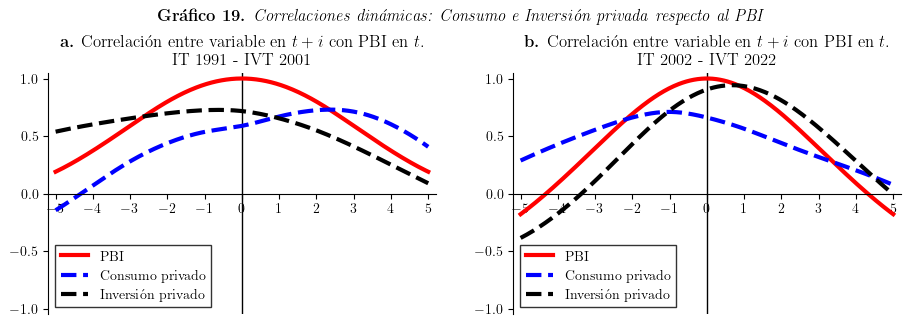

In [57]:
# GRÁFICO . CONSUMO E INVERSIÓN PRIVADA RESPECTO AL PBI

fig4, ax4 = plt.subplots(1,2, figsize=(11, 3.5))
ax4[0].axvline(x=0, color='k', linewidth=1)
ax4[0].plot(p1,y_y1, 'r', linewidth=3, label='PBI')
ax4[0].plot(p1,cpriv_y1, 'b--', linewidth=3, label='Consumo privado')
ax4[0].plot(p1,ipriv_y1, 'k--', linewidth=3, label='Inversión privado')
ax4[0].set_xlim(-5.2, 5.2)
ax4[0].set_ylim(-1.05, 1.05)
ax4[0].set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax4[0].set_yticks([-1, -0.5, 0, 0.5, 1])
ax4[0].spines['top'].set_visible(False)
ax4[0].spines['right'].set_visible(False)
ax4[0].spines['bottom'].set_position('zero')
ax4[0].legend(fancybox=False).get_frame().set_edgecolor('k')
ax4[0].set_title(r'\textbf{a.} Correlación entre variable en $t+i$ con PBI en $t$.'+'\n'+'IT 1991 - IVT 2001', loc='center', fontsize=12)


ax4[1].axvline(x=0, color='k', linewidth=1)
ax4[1].plot(p2,y_y2, 'r', linewidth=3, label='PBI')
ax4[1].plot(p2,cpriv_y2, 'b--', linewidth=3, label='Consumo privado')
ax4[1].plot(p2,ipriv_y2, 'k--', linewidth=3, label='Inversión privado')
ax4[1].set_xlim(-5.2, 5.2)
ax4[1].set_ylim(-1.05, 1.05)
ax4[1].set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax4[1].set_yticks([-1, -0.5, 0, 0.5, 1])
ax4[1].spines['top'].set_visible(False)
ax4[1].spines['right'].set_visible(False)
ax4[1].spines['bottom'].set_position('zero')
ax4[1].legend(fancybox=False).get_frame().set_edgecolor('k')
ax4[1].set_title(r'\textbf{b.} Correlación entre variable en $t+i$ con PBI en $t$.'+'\n'+'IT 2002 - IVT 2022', loc='center', fontsize=12)

fig4.suptitle(r'\textbf{Gráfico 19.} \textit{Correlaciones dinámicas: Consumo e Inversión privada respecto al PBI}', fontweight="bold")
fig4.subplots_adjust(top=0.8)
plt.savefig("Grafico19.pdf", format="pdf", bbox_inches="tight")

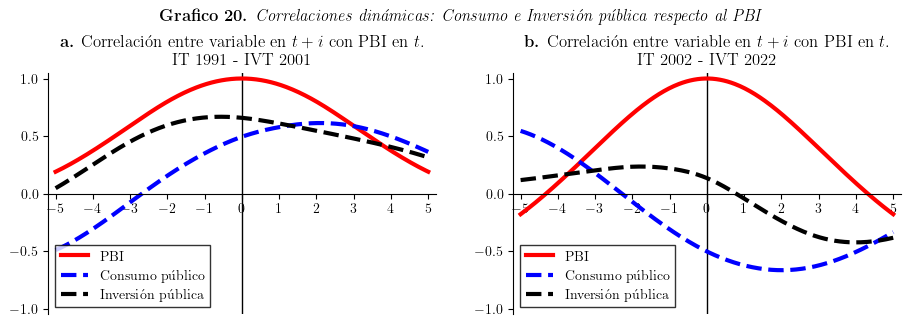

In [58]:
# GRÁFICO . CONSUMO E INVERSIÓN PÚBLICA RESPECTO AL PBI

fig4, ax4 = plt.subplots(1,2, figsize=(11, 3.5))
ax4[0].axvline(x=0, color='k', linewidth=1)
ax4[0].plot(p1,y_y1, 'r', linewidth=3, label='PBI')
ax4[0].plot(p1,cpub_y1, 'b--', linewidth=3, label='Consumo público')
ax4[0].plot(p1,ipub_y1, 'k--', linewidth=3, label='Inversión pública')
ax4[0].set_xlim(-5.2, 5.2)
ax4[0].set_ylim(-1.05, 1.05)
ax4[0].set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax4[0].set_yticks([-1, -0.5, 0, 0.5, 1])
ax4[0].spines['top'].set_visible(False)
ax4[0].spines['right'].set_visible(False)
ax4[0].spines['bottom'].set_position('zero')
ax4[0].legend(fancybox=False, loc='lower left').get_frame().set_edgecolor('k')
ax4[0].set_title(r'\textbf{a.} Correlación entre variable en $t+i$ con PBI en $t$.'+'\n'+'IT 1991 - IVT 2001', loc='center', fontsize=12)

ax4[1].axvline(x=0, color='k', linewidth=1)
ax4[1].plot(p2,y_y2, 'r', linewidth=3, label='PBI')
ax4[1].plot(p2,cpub_y2, 'b--', linewidth=3, label='Consumo público')
ax4[1].plot(p2,ipub_y2, 'k--', linewidth=3, label='Inversión pública')
ax4[1].set_xlim(-5.2, 5.2)
ax4[1].set_ylim(-1.05, 1.05)
ax4[1].set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax4[1].set_yticks([-1, -0.5, 0, 0.5, 1])
ax4[1].spines['top'].set_visible(False)
ax4[1].spines['right'].set_visible(False)
ax4[1].spines['bottom'].set_position('zero')
ax4[1].legend(fancybox=False, loc='lower left').get_frame().set_edgecolor('k')
ax4[1].set_title(r'\textbf{b.} Correlación entre variable en $t+i$ con PBI en $t$.'+'\n'+'IT 2002 - IVT 2022', loc='center', fontsize=12)

fig4.suptitle(r'\textbf{Grafico 20.} \textit{Correlaciones dinámicas: Consumo e Inversión pública respecto al PBI}', fontweight="bold")
fig4.subplots_adjust(top=0.8)
plt.savefig("Grafico20.pdf", format="pdf", bbox_inches="tight")

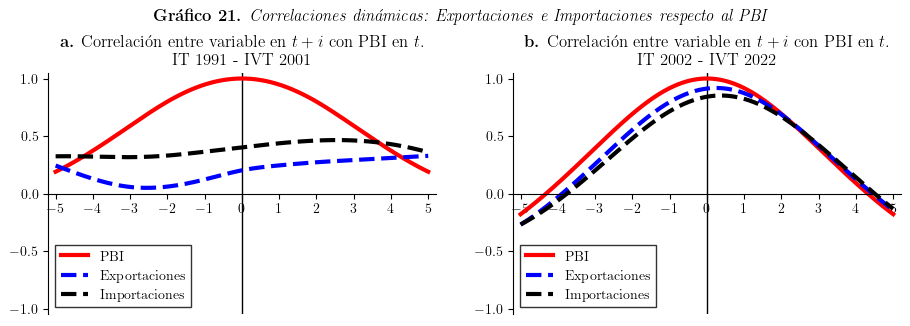

In [59]:
#  EXPORTACIONES E IMPORTACIONES PUBLICA RESPECTO AL PBI

fig4, ax4 = plt.subplots(1,2, figsize=(11, 3.5))
ax4[0].axvline(x=0, color='k', linewidth=1)
ax4[0].plot(p1,y_y1, 'r', linewidth=3, label='PBI')
ax4[0].plot(p1,exp_y1, 'b--', linewidth=3, label='Exportaciones')
ax4[0].plot(p1,imp_y1, 'k--', linewidth=3, label='Importaciones')
ax4[0].set_xlim(-5.2, 5.2)
ax4[0].set_ylim(-1.05, 1.05)
ax4[0].set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax4[0].set_yticks([-1, -0.5, 0, 0.5, 1])
ax4[0].spines['top'].set_visible(False)
ax4[0].spines['right'].set_visible(False)
ax4[0].spines['bottom'].set_position('zero')
ax4[0].legend(fancybox=False, loc='lower left').get_frame().set_edgecolor('k')
ax4[0].set_title(r'\textbf{a.} Correlación entre variable en $t+i$ con PBI en $t$.'+'\n'+'IT 1991 - IVT 2001', loc='center', fontsize=12)

ax4[1].axvline(x=0, color='k', linewidth=1)
ax4[1].plot(p2,y_y2, 'r', linewidth=3, label='PBI')
ax4[1].plot(p2,exp_y2, 'b--', linewidth=3, label='Exportaciones')
ax4[1].plot(p2,imp_y2, 'k--', linewidth=3, label='Importaciones')
ax4[1].set_xlim(-5.2, 5.2)
ax4[1].set_ylim(-1.05, 1.05)
ax4[1].set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
ax4[1].set_yticks([-1, -0.5, 0, 0.5, 1])
ax4[1].spines['top'].set_visible(False)
ax4[1].spines['right'].set_visible(False)
ax4[1].spines['bottom'].set_position('zero')
ax4[1].legend(fancybox=False, loc='lower left').get_frame().set_edgecolor('k')
ax4[1].set_title(r'\textbf{b.} Correlación entre variable en $t+i$ con PBI en $t$.'+'\n'+'IT 2002 - IVT 2022', loc='center', fontsize=12)

fig4.suptitle(r'\textbf{Gráfico 21.} \textit{Correlaciones dinámicas: Exportaciones e Importaciones respecto al PBI}', fontweight="bold")
fig4.subplots_adjust(top=0.8)
plt.savefig("Grafico21.pdf", format="pdf", bbox_inches="tight")

In [60]:
# Varianzas de los ciclos
# Analizaremos que tan volátil es el ciclo de una variable respecto del ciclo del PBI.

# Submuestra 1

Ti = 1  # Observación inicial
Tf = 45 # Observación final

desv1 = np.zeros(len(nombres))

desv1[0] = np.std(c_y_bk[Ti:Tf+1])
desv1[1] = np.std(c_cpriv_bk[Ti:Tf+1])
desv1[2] = np.std(c_cpub_bk[Ti:Tf+1])
desv1[3] = np.std(c_ipriv_bk[Ti:Tf+1])
desv1[4] = np.std(c_ipub_bk[Ti:Tf+1])
desv1[5] = np.std(c_exp_bk[Ti:Tf+1])
desv1[6] = np.std(c_imp_bk[Ti:Tf+1])

# Submuestra 2

Ti = 46  # Observación inicial
Tf = 126 # Observación final

desv2 = np.zeros(len(nombres))

desv2[0] = np.std(c_y_bk[Ti:Tf+1])
desv2[1] = np.std(c_cpriv_bk[Ti:Tf+1])
desv2[2] = np.std(c_cpub_bk[Ti:Tf+1])
desv2[3] = np.std(c_ipriv_bk[Ti:Tf+1])
desv2[4] = np.std(c_ipub_bk[Ti:Tf+1])
desv2[5] = np.std(c_exp_bk[Ti:Tf+1])
desv2[6] = np.std(c_imp_bk[Ti:Tf+1])

vol_rel1 = desv1/desv1[0]
vol_rel1 = np.array(vol_rel1)

vol_rel2 = desv2/desv2[0]
vol_rel2 = np.array(vol_rel2)

print(vol_rel1)
print(vol_rel2)

[1.         1.01884441 1.77022788 4.62156579 7.33399117 4.82415487
 6.95097953]
[1.         0.55839156 0.64112767 2.29847702 1.79038947 3.46139468
 3.39406228]


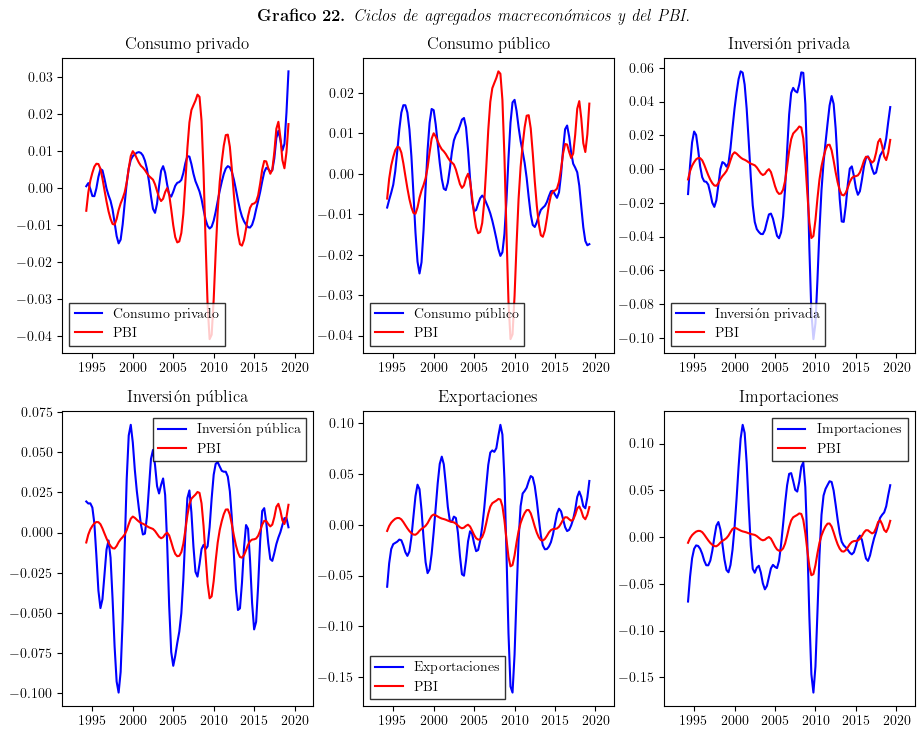

In [61]:
# GRÁFICO Ciclos de agregados macreconómicos y del PBI

fig8, ax8 = plt.subplots(2,3, figsize=(11, 8))
ax8 = ax8.flatten()
for i in range(len(ciclos_hp)-1):
    ax8[i].plot(ciclos_bk[i], 'b', label=nombres[i])
    ax8[i].plot(c_y_bk, 'r', label='PBI')
    ax8[i].set_title(nombres[i])
    ax8[i].legend(fancybox=False).get_frame().set_edgecolor('k')
    ax8[i].set_xlim(fecha[0],fecha[-1])
    ax8[i].set_xticks([ '1995', '2000', '2005' , '2010', '2015' , '2020' ])
    ax8[i].set_xticklabels([ '1995', '2000', '2005' , '2010', '2015' , '2020' ])
fig8.suptitle(r'\textbf{Grafico 22.} \textit{Ciclos de agregados macreconómicos y del PBI.}', fontweight="bold") # Título
fig8.subplots_adjust(top=0.92)
plt.savefig("Grafico22.pdf", format="pdf", bbox_inches="tight")

In [42]:
# Tabla Resumen 1:

# Submuestra 1: IT 1982 - IVT 2000 desde observación 1 hasta 76

Ti = 1  # Observación inicial
Tf = 76 # Observación final
max_p = 5

p = np.arange(-max_p, max_p + 1)

y_y = [c_y_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
cpriv_y = [c_cpriv_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
ipriv_y = [c_ipriv_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
cpub_y = [c_cpub_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
ipub_y = [c_ipub_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
exp_y = [c_exp_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
imp_y = [c_imp_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]

variables = ['PBI', 'Consumo privado', 'Consumo público', 'Inversión privada', 'Inversión pública', 'Exportaciones', 'Importaciones']
correl_din1 = [y_y, cpriv_y, ipriv_y, cpub_y, ipub_y, exp_y, imp_y]
correl_din1 = np.array(correl_din1)

correl_din1 = np.round(correl_din1,2)
vol_rel1 = np.round(vol_rel1,2)

In [43]:
# Tabla Resumen 1:

!sudo apt install texlive-latex-base
import subprocess

tabla1 = pd.DataFrame(correl_din1)
tabla1.insert(0, "Volatilidad Relativa al PBI", vol_rel1)
tabla1.insert(0, "Variables", variables)

# Usamos códigos en Latex para hacer nuestra Cuadro resumen
# Python puede correr código de Latex y darnos el resultado
# En este caso el resultado es un cuadro en PDF
columnas = tabla1.columns.tolist()
latex = r"""
\documentclass{article}
\usepackage{booktabs}
\usepackage[landscape, margin=1in]{geometry}
\usepackage{here}
\usepackage{multicol}
\usepackage{multirow}
\usepackage{caption}
\captionsetup[table]{labelfont={bf},name={Cuadro},labelsep=period}
\begin{document}
\setcounter{table}{0} % Para que empiece en la primera tabla
\begin{table}
\centering
\caption{\textit{Volatilidad y correlación cruzada con el PBI (1982.I - 2000.IV)}}
"""
latex += r"\begin{tabular}{l" + "c" * (len(columnas) - 1) + "}" + "\n"
latex += r"\toprule" + "\n"
latex += r"""
 & \multirow{2}{*}{\parbox{6.5em}{\centering Volatilidad relativa al PBI}} & \multicolumn{11}{c}{\centering Correlación cruzada de el PBI con} \\
 \cmidrule(lr){3-13}
 Variables (x) &  &  x(t-5) & x(t-4) & x(t-3) & x(t-2) & x(t-1) & x(t) & x(t+1) & x(t+2) & x(t+3) & x(t+4) & x(t+5) \\
"""
latex += r"\midrule" + "\n"

# Utilizamos los datos del data frame para llenar la tabla
for _, row in tabla1.iterrows():
    fila = " & ".join([
        f"{row[col]:.2f}".replace('.', '{,}')
        if isinstance(row[col], (int, float)) else str(row[col])
        for col in columnas
    ])
    latex += fila + r" \\" + "\n"

latex += r"\bottomrule" + "\n" + r"\end{tabular}" + "\n" + r"\end{table}" + "\n"
latex += r"""\end{document}
"""

# Guardar en archivo .tex
with open("Tabla1.tex", "w") as f:
    f.write(latex)

# Mostrar el resultado
print(latex)

# Ejecutamos el código .tex
subprocess.run(["pdflatex", "Tabla1.tex"])

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-latex-base is already the newest version (2021.20220204-1).
texlive-latex-base set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.

\documentclass{article}
\usepackage{booktabs}
\usepackage[landscape, margin=1in]{geometry}
\usepackage{here}
\usepackage{multicol}
\usepackage{multirow}
\usepackage{caption}
\captionsetup[table]{labelfont={bf},name={Cuadro},labelsep=period}
\begin{document}
\setcounter{table}{0} % Para que empiece en la primera tabla
\begin{table}
\centering
\caption{\textit{Volatilidad y correlación cruzada con el PBI (1982.I - 2000.IV)}}
\begin{tabular}{lcccccccccccc}
\toprule

 & \multirow{2}{*}{\parbox{6.5em}{\centering Volatilidad relativa al PBI}} & \multicolumn{11}{c}{\centering Correlación cruzada de el PBI con} \\
 \cmidrule(lr){3-13}
 Variables (x) &  &  x(t-5) & x(t-4) & x(t-3) & x(t-2) & x(t-1) & x(t) & x(t+1) & x(t+2) 

CompletedProcess(args=['pdflatex', 'Tabla1.tex'], returncode=0)

In [45]:
# Tabla Resumen 2:

# Submuestra 2: IT 2001 - IVT 2019 desde observación 77 hasta 152

Ti = 77  # Observación inicial
Tf = 152 # Observación final
max_p = 5

p = np.arange(-max_p, max_p + 1)

y_y = [c_y_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
cpriv_y = [c_cpriv_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
ipriv_y = [c_ipriv_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
cpub_y = [c_cpub_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
ipub_y = [c_ipub_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
exp_y = [c_exp_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]
imp_y = [c_imp_bk[Ti:Tf+1].shift(-i).corr(c_y_bk[Ti:Tf+1]) for i in p]

variables = ['PBI', 'Consumo privado', 'Consumo público', 'Inversión privada', 'Inversión pública', 'Exportaciones', 'Importaciones']
correl_din2 = [y_y, cpriv_y, ipriv_y, cpub_y, ipub_y, exp_y, imp_y]
correl_din2 = np.array(correl_din2)

correl_din2 = np.round(correl_din2,2)
vol_rel2 = np.round(vol_rel2,2)

In [46]:
# Tabla Resumen 2:

!sudo apt install texlive-latex-base
import subprocess

tabla2 = pd.DataFrame(correl_din2)
tabla2.insert(0, "Volatilidad Relativa al PBI", vol_rel2)
tabla2.insert(0, "Variables", variables)

# Usamos códigos en Latex para hacer nuestra Cuadro resumen
# Python puede correr código de Latex y darnos el resultado
# En este caso el resultado es un cuadro en PDF
columnas = tabla2.columns.tolist()
latex = r"""
\documentclass{article}
\usepackage{booktabs}
\usepackage[landscape, margin=1in]{geometry}
\usepackage{here}
\usepackage{multicol}
\usepackage{multirow}
\usepackage{caption}
\captionsetup[table]{labelfont={bf},name={Cuadro},labelsep=period}
\begin{document}
\setcounter{table}{1} % Ahora será la segunda tabla
\begin{table}
\centering
\caption{\textit{Volatilidad y correlación cruzada con el PBI (2001.I - 2019.IV)}}
"""
latex += r"\begin{tabular}{l" + "c" * (len(columnas) - 1) + "}" + "\n"
latex += r"\toprule" + "\n"
latex += r"""
 & \multirow{2}{*}{\parbox{6.5em}{\centering Volatilidad relativa al PBI}} & \multicolumn{11}{c}{\centering Correlación cruzada de el PBI con} \\
 \cmidrule(lr){3-13}
 Variables (x) &  &  x(t-5) & x(t-4) & x(t-3) & x(t-2) & x(t-1) & x(t) & x(t+1) & x(t+2) & x(t+3) & x(t+4) & x(t+5) \\
"""
latex += r"\midrule" + "\n"

# Utilizamos los datos del data frame para llenar la tabla
for _, row in tabla2.iterrows():
    fila = " & ".join([
        f"{row[col]:.2f}".replace('.', '{,}')
        if isinstance(row[col], (int, float)) else str(row[col])
        for col in columnas
    ])
    latex += fila + r" \\" + "\n"

latex += r"\bottomrule" + "\n" + r"\end{tabular}" + "\n" + r"\end{table}" + "\n"
latex += r"""\end{document}
"""

# Guardar en archivo .tex
with open("Tabla2.tex", "w") as f:
    f.write(latex)

# Mostrar el resultado
print(latex)

# Ejecutamos el código .tex
subprocess.run(["pdflatex", "Tabla2.tex"])

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-latex-base is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.

\documentclass{article}
\usepackage{booktabs}
\usepackage[landscape, margin=1in]{geometry}
\usepackage{here}
\usepackage{multicol}
\usepackage{multirow}
\usepackage{caption}
\captionsetup[table]{labelfont={bf},name={Cuadro},labelsep=period}
\begin{document}
\setcounter{table}{1} % Ahora será la segunda tabla
\begin{table}
\centering
\caption{\textit{Volatilidad y correlación cruzada con el PBI (2001.I - 2019.IV)}}
\begin{tabular}{lcccccccccccc}
\toprule

 & \multirow{2}{*}{\parbox{6.5em}{\centering Volatilidad relativa al PBI}} & \multicolumn{11}{c}{\centering Correlación cruzada de el PBI con} \\
 \cmidrule(lr){3-13}
 Variables (x) &  &  x(t-5) & x(t-4) & x(t-3) & x(t-2) & x(t-1) & x(t) & x(t+1) & x(t+2) & x(t+3) & x(t+4) & x(t+5) \\
\midrule
PBI & 1{,}00 & 0

CompletedProcess(args=['pdflatex', 'Tabla2.tex'], returncode=0)